<div style="font-size: 36px; line-height: 1.0;">Исследование базы вакансий вакансий HeadHunter для           Аналитиков данных и Бизнес-аналитиков</div>


# Описание и цели проекта

Представлены данные полученые из API HeadHunter: две таблицы с вакансиями для Аналитиков данных (далее - ДА) и Бизнес-аналитиков (далее - БА).

__Цель проекта:__ выявить различия в предлагаемых вакансиях для Аналитиков данных и Бизнес-аналитиков.


__Мои задачи:__
- подготовить описание “идеальных кандидатов” на должности ДА и БА для различных грейдов(опыт работы);
- определить типичное место работы для ДА и БА;
- сделать расчет помесячной динамики количества вакансий для ДА и БА для различных грейдов.

__Описание данных:__  
Данные содержат информацию о вакансиях для ДА и БА.  
* **id** — уникальный идентификатор вакансии;
* **name** — название вакансии;
* **published_at** — дата размещения вакансии;
* **alternate_url** — url-ссылка на вакансию;
* **type** — тип вакансии (открытая/закрытая);
* **employer** — наниматель;
* **department** — подразделение нанимателя;
* **area** — расположение офиса нанимателя;
* **experience** — требуемый опыт работы;
* **key_skills** — ключевые навыки;
* **schedule** — график работы;
* **employment** — тип занятости;
* **description** и **description_lemmatized** — описание вакансии;
* **salary_from** — зарплата "от";
* **salary_to** — зарплата "до;
* **salary_bin** — зарплатная вилка;
* **key_skills_from_key_skills_field** — ключевые навыки из поля "key_skills" и описания вакансии;
* **hard_skills_from_description** — хардскиллы из описания вакансии;
* **soft_skills_from_description** — софтскиллы из описания вакансии. 


# Знакомство с данными

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#загружаем данные
ba_df = pd.read_excel('/Users/aleksei/Desktop/Mast/vacancies_ba_new.xlsx')
da_df = pd.read_excel('/Users/aleksei/Desktop/Mast/vacancies_da_new.xlsx')

#установим максимальное количество выводимых на экран столбцов
pd.options.display.max_columns=40

#настроим отображение чисел float с двумя знаками после запятой и с разделителем тысяч.
pd.set_option('display.float_format', '{:,.2f}'.format)

## Вывод таблиц 

In [3]:
#выведем первые строки таблицы БА
print('Вакансии БА')
ba_df.head()

Вакансии БА


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,https://hh.ru/vacancy/49470036,Открытая,ICS Consulting,NaN,Москва,Junior+ (1-3 years),"['Умение работать с людьми', 'Документация', '...",Полный день,Полная занятость,на основе конкурсного отбора обязанности учас...,основа конкурсный отбор обязанность участие ко...,"90,000.00","120,000.00",От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,https://hh.ru/vacancy/55186681,Открытая,Первый Бит,NaN,Москва,Middle (3-6 years),"['1С: Документооборот', '1С: Управление Произв...",Полный день,Полная занятость,"привет, будущий коллега!мы приглашаем проектны...",привет будущий коллега приглашать проектный ан...,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,https://hh.ru/vacancy/67043806,Открытая,Digital Design,NaN,Москва,Junior+ (1-3 years),"['Разработка проектной документации', 'Электро...",Полный день,Полная занятость,digital design более четверти века разрабатыва...,digital design четверть век разрабатывать внед...,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,https://hh.ru/vacancy/67345392,Открытая,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),"['IDEF0', 'Документация', 'Аналитическое мышле...",Полный день,Полная занятость,солво – лидер российского рынка it решений для...,солво лидер российский рынок it решение автома...,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление"
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,https://hh.ru/vacancy/67498251,Открытая,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),"['Бизнес-анализ', 'Документация']",Удаленная работа,Полная занятость,"обязанности: анализ бизнес-процессов; сбор, а...",обязанность анализ бизнес процесс сбор анализ ...,"200,000.00",NaN,ЗП не указана,Бизнес-анализ,NaN,Документация


In [4]:
#выведем первые строки таблицы ДА
print('Вакансии ДА')
da_df.head()

Вакансии ДА


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,https://hh.ru/vacancy/50293361,Открытая,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Power Pivot', 'Прогнозирование', '...",Полный день,Полная занятость,для решение разнообразных и интересных задач в...,решение разнообразный интересный задача команд...,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных...",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,https://hh.ru/vacancy/79046568,Открытая,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Яндекс.Директ', 'Маркетинговый анализ', 'Кон...",Полный день,Полная занятость,крупная мебельная компания в поиске web-аналит...,крупный мебельный компания поиск web аналитик ...,"120,000.00","200,000.00",От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитик...",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,https://hh.ru/vacancy/79115520,Открытая,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),[],Полный день,Полная занятость,команда сеть продаж сбера ищет руководителя на...,команда сеть продажа сбер искать руководитель ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,https://hh.ru/vacancy/79598893,Открытая,WILDBERRIES,NaN,Москва,Junior+ (1-3 years),"['SQL', 'Управленческая отчетность', 'OLAP', '...",Полный день,Полная занятость,wildberries — это крупнейшая в странах еаэс ме...,wildberries крупный страна еаэс международный ...,NaN,NaN,ЗП не указана,"SQL, Управленческая отчетность, SQL запросы, E...",NaN,NaN
4,80616218,Data Analyst,2023-12-03 14:43:59,https://hh.ru/vacancy/80616218,Открытая,Контакт,NaN,Санкт-Петербург,Junior+ (1-3 years),"['SQL', 'confluence', 'Документация', 'Jira', ...",Полный день,Полная занятость,мы строим современную и технологичную финтех-к...,строить современный технологичный финтех компа...,NaN,NaN,ЗП не указана,"Power BI, SQL, Jira, Confluence",confluence,Документация


## Выводы.    
В двух таблицах представленны данные о вакансиях в компаниях для ДА и БА. Указаны сведения о названии компаний, дате публикаций вакансий, графике работы, предлагаемой зарплате, месте работы(город), а также требования к стажу и навыкам.   

# Предобработка и исследовательский анализ данных 

## Удаление столбцов которые не будут задействованы.

- Нам не будут нужны столбцы с ссылками на вакансии, как и с типом вакансий , т.к. в данных только открытые вакансии.  
- Столбец с ключевыми навыками тоже можно удалить, т.к. при выгрузке значения этого поля перетекли в поле "key_skills_from_key_skills_field" вместе с ключевыми навыками.  
- Столбцы с описанием вакансий мы, соответственно, тоже удаляем, они были задействованы при создании столбцов "key_skills_from_key_skills_field", "hard_skills_from_description", "soft_skills_from_description".

In [5]:
da_df = da_df.drop(columns=['alternate_url', 'type', 'key_skills', 'description', 'description_lemmatized']) 
ba_df = ba_df.drop(columns=['alternate_url', 'type', 'key_skills', 'description', 'description_lemmatized'])

## Рассмотрим общую информацию о датасетах.

Рассмотрим общую информацию о данных с помощью функции. Она выводит на экран первые строки датасета, общую информацию о таблице, долю пропусков в каждом столбце, считает количество дубликатов, дает описание столбцам с количественными значениями, в столбцах с категориальными данными показывает количество повторяющихся значений, приводит названия колонок к нижнему регистру. 

### Рассмотрим датасет с вакансиями для ДА.  

In [6]:
def description(data):
    display(data.head())
    print(25*'-')
    data.info()
    print(25*'-')
    print('Доля пропусков')
    display(data.isna().mean().round(3)*100)
    print(25*'-')
    print ('Количество дубликатов -', data.duplicated().sum())
    print(25*'-')
    numeric_columns=data.describe().columns
    display(data.describe())
    print(25*'-')
    data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]
    for column_name in data.columns:
        if column_name not in numeric_columns:
            display(data[column_name].value_counts())
            print(25*'-')
    return data

In [7]:
da_df = description(da_df)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,"Красное & Белое, розничная сеть",NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"SQL, VBA, MS SQL, MS PowerPoint, Анализ данных...",NaN,Коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,НОНТОН.РФ,NaN,Санкт-Петербург,Junior+ (1-3 years),Полный день,Полная занятость,"120,000.00","200,000.00",От 200 тысяч до 300 тысяч,"Google Analytics, Яндекс.Метрика, Веб-аналитик...",NaN,NaN
2,79115520,Senior Data Analyst,2023-10-15 10:00:10,СБЕР,Сбер. Data Science,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,NaN,NaN,NaN
3,79598893,Data Analyst (SQL),2023-12-04 09:31:34,WILDBERRIES,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"SQL, Управленческая отчетность, SQL запросы, E...",NaN,NaN
4,80616218,Data Analyst,2023-12-03 14:43:59,Контакт,NaN,Санкт-Петербург,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Power BI, SQL, Jira, Confluence",confluence,Документация


-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                786 non-null    int64         
 1   name                              786 non-null    object        
 2   published_at                      786 non-null    datetime64[ns]
 3   employer                          786 non-null    object        
 4   department                        188 non-null    object        
 5   area                              786 non-null    object        
 6   experience                        786 non-null    object        
 7   schedule                          786 non-null    object        
 8   employment                        786 non-null    object        
 9   salary_from                       69 non-null     float64       
 10  salary_to               

id                                  0.00
name                                0.00
published_at                        0.00
employer                            0.00
department                         76.10
area                                0.00
experience                          0.00
schedule                            0.00
employment                          0.00
salary_from                        91.20
salary_to                          89.10
salary_bin                          0.00
key_skills_from_key_skills_field   33.60
hard_skills_from_description       64.20
soft_skills_from_description       68.40
dtype: float64

-------------------------
Количество дубликатов - 0
-------------------------


,id,published_at,salary_from,salary_to
count,786.00,786,69.00,86.00
mean,"89,334,666.71",2023-12-03 06:36:14.533078784,"167,361.59","242,533.72"
min,"50,293,361.00",2023-09-26 18:38:02,"20,000.00","40,000.00"
25%,"88,117,363.75",2023-10-26 15:10:33.750000128,"100,000.00","123,662.50"
50%,"89,461,517.00",2023-12-03 17:07:57,"180,000.00","245,000.00"
75%,"90,801,516.25",2024-01-09 15:58:47.500000,"233,750.00","327,250.00"
max,"92,418,848.00",2024-01-30 15:49:28,"398,000.00","561,000.00"
std,"2,441,171.63",NaN,"78,265.81","125,657.47"


-------------------------


name
Data Analyst                                             131
Data analyst                                              37
Senior Data Analyst                                       34
Senior Data Analyst (User Acquisition)                    18
Junior Data Analyst                                       15
                                                        ... 
Data Analyst WMS                                           1
Game Analyst/ Data Analyst                                 1
Руководитель отдела анализа данных /Lead Data Analyst      1
Аналитик данных по ТБ (Safety Data Analyst)                1
Стажер Data analyst                                        1
Name: count, Length: 344, dtype: int64

-------------------------


employer
СБЕР                      101
WILDBERRIES                36
МТС                        32
Playrix                    21
МАГНИТ, Розничная сеть     10
                         ... 
ООО «KPMG AUDIT»            1
Новартис Фарма              1
РЕТЕНТ                      1
PrimeXBT                    1
Циан                        1
Name: count, Length: 295, dtype: int64

-------------------------


department
Сбер для экспертов                              70
«МТС», Digital                                  27
Сбер. IT                                        17
Сбер. Data Science                              14
билайн: ИТ, Data, Digital                        7
Леруа Мерлен. Центральный офис                   5
Росбанк: Аналитика                               4
Газпромбанк                                      4
ПАО «Промсвязьбанк», Бизнес и инфраструктура     4
Компания «СПОРТМАСТЕР», Sportmaster Lab          3
 Альфа-Банк                                      3
«МТС»                                            3
Ozon Fintech                                     3
«РОСБАНК»                                        2
VK, Бизнес юнит технологий ИИ                    2
Росбанк: Data                                    2
«Роза Хутор» IT                                  1
ВкусВилл. Офис                                   1
Rambler&Co СберСеллер                            1
ИТ                  

-------------------------


area
Москва                          514
Санкт-Петербург                  98
Минск                            31
Алматы                           22
Екатеринбург                     16
Тбилиси                          14
Ташкент                          13
Казань                           10
Новосибирск                       9
Сербия                            9
Краснодар                         6
Армения                           5
Тюмень                            4
Ростов-на-Дону                    4
Кипр                              4
Астана                            3
Владивосток                       3
Батуми                            2
Нижний Новгород                   2
Черногория                        2
Иваново (Ивановская область)      2
Химки                             1
Баку                              1
Атырау                            1
Турция                            1
Аксай (Казахстан)                 1
Бишкек                            1
Рязань                 

-------------------------


experience
Junior+ (1-3 years)      387
Middle (3-6 years)       355
Junior (no experince)     25
Senior (6+ years)         19
Name: count, dtype: int64

-------------------------


schedule
Полный день         598
Удаленная работа    161
Гибкий график        26
Сменный график        1
Name: count, dtype: int64

-------------------------


employment
Полная занятость       777
Частичная занятость      5
Стажировка               2
Проектная работа         2
Name: count, dtype: int64

-------------------------


salary_bin
ЗП не указана                700
От 200 тысяч до 300 тысяч     28
Больше 300 тысяч              28
От 100 тысяч до 200 тысяч     21
Меньше 100 тысяч               9
Name: count, dtype: int64

-------------------------


key_skills_from_key_skills_field
Product Analytics, Python, SQL, Data Analysis, Big Data                                    15
SQL, Python                                                                                13
Python, SQL                                                                                 9
Python, SQL, A/B тесты                                                                      9
SQL                                                                                         7
                                                                                           ..
SQL, Python, Статистический анализ                                                          1
SQL, A/B тесты, Статистический анализ                                                       1
SQL, Python, Pandas, Анализ данных, Data Analysis, Работа в команде, Коммуникабельность     1
SQL, analyst, SDLC, Software Development, Payments                                          1
Python, SQL, Linux         

-------------------------


hard_skills_from_description
Pandas                        175
confluence                     44
Юнит-экономика                 43
Pandas, confluence             11
Google Sheets                   2
Pandas, Юнит-экономика          2
confluence, Юнит-экономика      2
Pandas, Google Sheets           2
Name: count, dtype: int64

-------------------------


soft_skills_from_description
Документация                                                                                                                        71
Коммуникация                                                                                                                        46
Аналитическое мышление                                                                                                              38
Коммуникация, Документация                                                                                                          21
Проактивность                                                                                                                       13
Креативность                                                                                                                         5
Коммуникация, Документация, Аналитическое мышление                                                                                   5
Документация, Аналитическо

-------------------------


- Всего вакансий для ДА в датасете 786.
- Типы данных в столбцах соответствуют содержимому.  
- Дубликаты отсутствуют.  
- Больше всего пропусков в столбцах с указанием зарплаты, пропуски в столбце department на анализ не повлияют.  
- В столбцах с зарплатой предварительно аномалий не наблюдается.  
- Больше всего вакансий предлагает СБЕР, за ним с большим отрывом WILDBERRIES и МТС.  
- Преобладающее количество вакансий предложено в Москве.  
- Больше всего требуются Junior+ и Middle аналитики.  
- Предпочтительным графиком работы в большинстве вакансий является «полный день».  
- Почти все вакансии размещены на полную занятость.  
- Зарплата не указана в 700 вакансиях.  
- Столбцы с навыками требуют детального рассмотрения и анализа.

### Рассмотрим датасет с вакансиями для БА.  

In [8]:
description(ba_df)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,ICS Consulting,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,"90,000.00","120,000.00",От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Первый Бит,NaN,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Digital Design,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление"
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),Удаленная работа,Полная занятость,"200,000.00",NaN,ЗП не указана,Бизнес-анализ,NaN,Документация


-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                4171 non-null   int64         
 1   name                              4171 non-null   object        
 2   published_at                      4171 non-null   datetime64[ns]
 3   employer                          4171 non-null   object        
 4   department                        651 non-null    object        
 5   area                              4171 non-null   object        
 6   experience                        4171 non-null   object        
 7   schedule                          4171 non-null   object        
 8   employment                        4171 non-null   object        
 9   salary_from                       927 non-null    float64       
 10  salary_to             

id                                  0.00
name                                0.00
published_at                        0.00
employer                            0.00
department                         84.40
area                                0.00
experience                          0.00
schedule                            0.00
employment                          0.00
salary_from                        77.80
salary_to                          84.80
salary_bin                          0.00
key_skills_from_key_skills_field   36.60
hard_skills_from_description       84.50
soft_skills_from_description       37.60
dtype: float64

-------------------------
Количество дубликатов - 0
-------------------------


,id,published_at,salary_from,salary_to
count,"4,171.00",4171,927.00,633.00
mean,"89,692,423.72",2023-12-19 19:39:03.440422144,"109,891.57","152,817.91"
min,"49,470,036.00",2023-10-02 09:29:47,60.00,"30,000.00"
25%,"88,880,149.00",2023-11-20 10:01:53,"69,825.00","90,000.00"
50%,"90,031,468.00",2023-12-20 09:07:52,"95,000.00","140,000.00"
75%,"91,322,815.00",2024-01-19 15:46:38,"150,000.00","200,000.00"
max,"92,419,423.00",2024-01-30 15:58:58,"350,000.00","467,500.00"
std,"2,558,833.87",NaN,"62,102.03","78,582.25"


-------------------------


name
Бизнес-аналитик                                                         1349
Ведущий бизнес-аналитик                                                  123
Бизнес-аналитик 1С                                                       103
Business Analyst                                                          58
Младший бизнес-аналитик                                                   47
                                                                        ... 
Business analyst (фармацевтика)                                            1
Бизнес-аналитик CJE (Накопительные вклады и счета)                         1
Бизнес-аналитик по ипотечному кредитованию (проект Импортозамещение)       1
Бизнес-аналитик (middle+)                                                  1
Ведущий бизнес-аналитик группы операционного ПО                            1
Name: count, Length: 1550, dtype: int64

-------------------------


employer
Банк ВТБ (ПАО)            88
Aston                     66
СБЕР                      58
МАГНИТ, Розничная сеть    56
Комус                     38
                          ..
АКБ Тенге Банк             1
АККЕРМАНН ЦЕМЕНТ           1
Банк Компаньон             1
Belkanton Group            1
Рельеф-Центр               1
Name: count, Length: 1712, dtype: int64

-------------------------


department
Сбер для экспертов                                                          43
ПАО ВТБ, Средний и малый бизнес                                             37
ПАО ВТБ, Розничный бизнес                                                   29
ПАО «Промсвязьбанк», Бизнес и инфраструктура                                23
Сибур                                                                       23
                                                                            ..
ГЛОРИЯ ДЖИНС. IT                                                             1
Петербургская Недвижимость                                                   1
Гринатом. Многофункциональный Центр Обслуживания.  Управление персоналом     1
Гринатом. Многофункциональный Центр Обслуживания.  Финансы и бухгалтерия     1
Рельеф-Центр. IT                                                             1
Name: count, Length: 143, dtype: int64

-------------------------


area
Москва                                2266
Санкт-Петербург                        436
Минск                                  173
Екатеринбург                           135
Казань                                 116
                                      ... 
Электросталь                             1
Павловский Посад                         1
Березовский (Свердловская область)       1
Саранск                                  1
Одинцово                                 1
Name: count, Length: 125, dtype: int64

-------------------------


experience
Junior+ (1-3 years)      2122
Middle (3-6 years)       1596
Junior (no experince)     364
Senior (6+ years)          89
Name: count, dtype: int64

-------------------------


schedule
Полный день         3335
Удаленная работа     717
Гибкий график        115
Сменный график         4
Name: count, dtype: int64

-------------------------


employment
Полная занятость       4024
Стажировка              120
Проектная работа         19
Частичная занятость       8
Name: count, dtype: int64

-------------------------


salary_bin
ЗП не указана                3538
От 100 тысяч до 200 тысяч     268
Меньше 100 тысяч              173
От 200 тысяч до 300 тысяч     146
Больше 300 тысяч               46
Name: count, dtype: int64

-------------------------


key_skills_from_key_skills_field
1С: Бухгалтерия, 1С: Предприятие 8, ERP-системы на базе 1С, Бухгалтерский учет, Аналитик 1С, Бизнес-анализ, 1С: Зарплата и управление персоналом, 1С: Документооборот, Аналитическое мышление, Автоматизация процессов управления персоналом    33
Бизнес-анализ                                                                                                                                                                                                                                   30
UML, SQL, Business Analysis                                                                                                                                                                                                                     23
Бизнес-анализ, Работа в команде, Моделирование бизнес процессов, Функциональные требования                                                                                                                                                    

-------------------------


hard_skills_from_description
confluence                       588
Юнит-экономика                    33
Pandas                            14
confluence, Юнит-экономика         9
Pandas, Юнит-экономика             2
Юнит-экономика, Google Sheets      1
Google Sheets                      1
Name: count, dtype: int64

-------------------------


soft_skills_from_description
Документация                                                                              1300
Коммуникация, Документация                                                                 292
Коммуникация                                                                               254
Аналитическое мышление                                                                     205
Документация, Аналитическое мышление                                                       139
                                                                                          ... 
Решение проблем, Адаптивность, Принятие решений                                              1
Документация, Эмпатия, Переговоры                                                            1
Коммуникация, Решение проблем, Презентация результатов, Переговоры, Внимание к деталям       1
Работа в команде, Письменная коммуникация, Документация, Переговоры                          1
Лидерство            

-------------------------


,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,ICS Consulting,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,"90,000.00","120,000.00",От 100 тысяч до 200 тысяч,"Грамотность, Деловая переписка, Умение работат...",NaN,"Коммуникация, Документация, Переговоры"
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Первый Бит,NaN,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Управление проектами, Бизнес-анализ, Системный...",NaN,NaN
2,67043806,Бизнес-аналитик,2023-11-15 17:46:22,Digital Design,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Разработка проектной документации, Разработка ...",NaN,"Коммуникация, Документация"
3,67345392,"Бизнес-аналитик (по логистике морских портов, ...",2024-01-17 12:53:15,СОЛВО,NaN,Санкт-Петербург,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"UML, BPMN, IDEF0, Английский язык, IDEF",NaN,"Документация, Аналитическое мышление"
4,67498251,Бизнес-аналитик в Банк,2024-01-29 12:05:14,Сателл ИТ,NaN,Москва,Junior+ (1-3 years),Удаленная работа,Полная занятость,"200,000.00",NaN,ЗП не указана,Бизнес-анализ,NaN,Документация
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,92417468,Бизнес-аналитик Lead/ Senior (Pre-sale и запус...,2024-01-30 15:31:29,Рексофт,NaN,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Бизнес-анализ, Моделирование бизнес процессов,...",NaN,NaN
4167,92417469,Бизнес-аналитик Lead/ Senior (Pre-sale и запус...,2024-01-30 15:31:29,Рексофт,NaN,Санкт-Петербург,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Бизнес-анализ, Моделирование бизнес процессов,...",NaN,NaN
4168,92417922,"Business Analyst, remote",2024-01-30 15:39:01,Тайгер Трейд,NaN,Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Business Analysis, BPMN, UML, Atlassian Conflu...",confluence,NaN
4169,92418141,Бизнес-аналитик,2024-01-30 15:43:00,Рельеф-Центр,Рельеф-Центр. IT,Рязань,Junior+ (1-3 years),Полный день,Полная занятость,"50,000.00","70,000.00",Меньше 100 тысяч,"Бизнес-анализ, Бизнес-аналитика, CRM",NaN,NaN


- Всего вакансий для БА в датасете 4171.
- Типы данных в столбцах соответствуют содержимому.  
- Дубликаты отсутствуют.  
- Больше всего пропусков в столбцах с указанием зарплаты, пропуски в столбце department на анализ не повлияют.  
- В столбцах с зарплатой предварительно аномалий не наблюдается.  
- Больше всего вакансий предлагает Банк ВТБ, Aston и Сбер.      
- Преобладающее количество вакансий предложено в Москве.  
- Больше всего требуются Junior+ и Middle аналитики.  
- Предпочтительным графиком работы в большинстве вакансий является «полный день».  
- Почти все вакансии размещены на полную занятость.  
- Зарплата не указана в 3538 вакансиях.  
- Столбцы с навыками требуют детального рассмотрения и анализа.

## Значения колонки experience. 

Для удобства сократим названия грейдов в столбце experience и приведем их к нижнему регистру.

In [9]:
ba_df['experience'] = ba_df['experience'].str.split(' ').str[0]
da_df['experience'].unique()

array(['Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

In [10]:
da_df['experience'] = da_df['experience'].str.split(' ').str[0]
da_df['experience'].unique()

array(['Junior+', 'Middle', 'Senior', 'Junior'], dtype=object)

## Месяц публикации вакансий

Выделим месяц публикации вакансий в отдельный столбец для удобства работы в дальнейшем.

In [11]:
ba_df['month'] = ba_df['published_at'].dt.to_period('M').dt.to_timestamp()
da_df['month'] = da_df['published_at'].dt.to_period('M').dt.to_timestamp()

## Работа с пропущенными значениями 

- Пропуски в категориальных столбцах (key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description) заменим на пробел.   
- Имеется большое кол-во пропусков в столбцах salary_from и salary_to замена их на медианные значения может исказить реальную картину, поэтому заменим их заглушками. Также есть пропуски в столбце department, их много, но они не повлияют на наше исследование, но все таки заменим и их на заглушки. 

Заполним пропуски в датасете вакансий для ДА

In [12]:
#заполняем пропуски в зарплатных столбцах на 0
da_df[['salary_from','salary_to']] = da_df[['salary_from','salary_to']].fillna(0)
#заполняем пропуски в столбце 'department' для ДА на 'not_defined'
da_df['department'] = da_df['department'].fillna('not_defined')
#заполняем пропуски в столбцах навыки
da_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']] = \
da_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].fillna(' ')

Заполним пропуски в датасете вакансий для БА

In [13]:
#заполняем пропуски в зарплатных столбцах на 0
ba_df[['salary_from','salary_to']] = ba_df[['salary_from','salary_to']].fillna(0)
#заполняем пропуски в столбце 'department' на 'not_defined'
ba_df['department'] = ba_df['department'].fillna('not_defined')
#заполняем пропуски в столбцах навыки
ba_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']] = \
ba_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].fillna(' ')

In [14]:
ba_df[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].isna().sum()

key_skills_from_key_skills_field    0
hard_skills_from_description        0
soft_skills_from_description        0
dtype: int64

## Зарплата в зависимости от опыта.

In [15]:
#процент вакансий для БА, где указана зарплата
(ba_df.query('salary_bin != "ЗП не указана"')['salary_bin'].count() / ba_df['salary_bin'].count()*100).round()

15.0

In [16]:
#процент вакансий для ДА, где указана зарплата
(da_df.query('salary_bin != "ЗП не указана"')['salary_bin'].count() / da_df['salary_bin'].count()*100).round()

11.0

Стоит отметить, что для БА зарплата указана только для  26% вакансий, а для ДА - 13%.

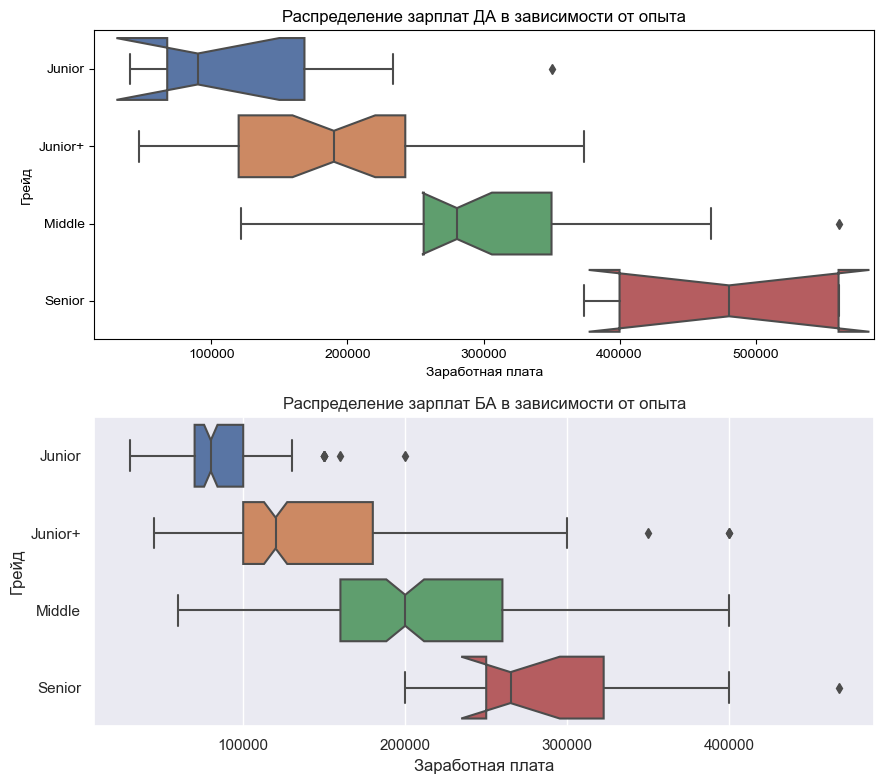

In [17]:
filtr_da = da_df.query('salary_bin != "ЗП не указана"')
filtr_ba = ba_df.query('salary_bin != "ЗП не указана"')

plt.figure(figsize=(9, 8))

plt.subplot(2, 1, 1)
sns.set_theme()
sns.boxplot(data=filtr_da.sort_values(by='experience'), x='salary_to', y='experience', notch=True)

plt.title('Распределение зарплат ДА в зависимости от опыта') 
plt.xlabel('Заработная плата')          
plt.ylabel('Грейд') 

plt.subplot(2, 1, 2)
sns.set_theme()
sns.boxplot(data=filtr_ba.sort_values(by='experience'), x='salary_to', y='experience', notch=True)

plt.title('Распределение зарплат БА в зависимости от опыта') 
plt.xlabel('Заработная плата')          
plt.ylabel('Грейд') 

plt.tight_layout() 
plt.show()

__Комментарий:__  Результат ожидаемый - чем больше опыта, тем выше уровень зарплаты.

## Работа с ключевыми навыками.

Навыки в столбце лучше разбить на отдельные, так как при текущем раскладе у нас имеется набор навыков по которым сложно будет судить, какие навыки больше всего требуются. Для этого приведем значения столбца key_skills_from_key_skills_field, soft_skills_from_description и hard_skills_from_description к нижнему регистру, уберем лишние пробелы, и для каждой вакансии создадим список из скилов применив .str.split(), а затем разобъем их  на hard и софт.

### Объединение всех навыков в одну колонку.

In [18]:
#функия для разделения навыков в каждой строчке
def split_skills(data, cols):
    for col in cols:
        data[col] = data[col].str.lower().str.replace(' ', '_').str.replace(',_', ' ').str.split()

Применяем функцию split_skills к столбцам ДА и БА датасетов.

In [19]:
#для ДА
split_skills(
    da_df, ['key_skills_from_key_skills_field', 'soft_skills_from_description', 'hard_skills_from_description'])
#для БА
split_skills(
    ba_df, ['key_skills_from_key_skills_field', 'soft_skills_from_description', 'hard_skills_from_description'])

Теперь создадим функцию которая обрабатывает указанный столбец навыков в DataFrame, объединяя неявные дубликаты и возвращая обновленный DataFrame.

In [20]:
def process_skills(df):
    
    #объединяем все навыки в один столбец
    df['key_skills_from_key_skills_field'] = \
    df['key_skills_from_key_skills_field'] + df['hard_skills_from_description'] + df['soft_skills_from_description']
    
    #создаем DataFrame из индексов и навыков для обработки
    temp = pd.DataFrame(df['key_skills_from_key_skills_field'].explode())

    #функция для объединения неявных дубликатов
    def unify_duplicates(row):
        if 'sql' in row:
            return 'sql '
        elif 'python' in row or 'pandas' in row or 'numpy' in row or 'matplotlib' in row or 'plotly' in row:
            return 'python '
        elif 'бизнес-анализ' in row or 'бизнес-аналитика' in row or 'business_analysis' in row:
            return 'business_analysis '
        elif 'data_analysis' in row or 'анализ_данных' in row:
            return 'data_analysis '
        elif 'баз' in row:
            return 'базы_данных '
        elif 'виз' in row or row == 'bi':
            return 'bi '
        elif 'power' in row and not 'point' in row:
            return 'power_bi '
        elif 'point' in row:
            return 'power_point '
        elif 'excel' in row:
            return 'excel '
        elif '1с' in row or '1c' in row:
            return '1С '
        elif 'spark' in row:
            return 'spark '
        elif 'olap' in row:
            return 'olap '
        else: 
            return row + ' '

    #создаем новый столбик и применяем функцию
    temp['new'] = temp['key_skills_from_key_skills_field'].apply(unify_duplicates)
    temp = temp.reset_index()

    #удаляем дубли по индексу и значению нового столбца
    temp = temp.reset_index().drop_duplicates(subset=['index', 'new'])
    
    #собираем обратно под свой индекс все навыки вместе 
    temp = temp.pivot_table(index='index', values='new', aggfunc='sum')

    #обновляем исходный DataFrame
    df['key_skills_from_key_skills_field'] = temp['new']
    
    #переименовываем столбик
    df = df.rename(columns={'key_skills_from_key_skills_field': 'all_skills'})
    
    #снова разделяем строку в колонке на отдельные навыки 
    #df['all_skills'] = df['all_skills'].str.split()

    return df

In [21]:
#применение функции к da_df
da_df = process_skills(da_df)

In [22]:
ba_df.sample(2)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,month
3417,91662663,Бизнес-аналитик (Биллинг),2024-01-15 15:48:10,MANGO OFFICE,not_defined,Москва,Middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,"[бизнес-анализ, системный_анализ, деловая_комм...",[_],[_],2024-01-01
1606,89503639,Бизнес-аналитик,2023-11-18 15:07:36,Интронекс Сетевые Решения,not_defined,Раменское,Junior+,Удаленная работа,Полная занятость,"80,000.00",0.00,ЗП не указана,"[деловая_коммуникация, аналитическое_мышление,...",[_],[аналитическое_мышление],2023-11-01


In [23]:
#применение функции к ba_df
ba_df = process_skills(ba_df)

In [24]:
ba_df.sample(2)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills_from_description,soft_skills_from_description,month
1103,88972369,Бизнес-аналитик,2023-11-02 07:57:19,Демир Кыргыз Интернэшнл Банк,not_defined,Бишкек,Junior,Полный день,Полная занятость,0.00,0.00,ЗП не указана,_ документация,[_],[документация],2023-11-01
700,88509220,Бизнес-аналитик Senior,2023-10-23 10:15:56,Опендэв,not_defined,Москва,Middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,business_analysis _ документация,[_],[документация],2023-10-01


### Разделение навыков на soft и hard.

Теперь нам нужно разделить эти списки на софт и хард скиллы. Для этого в начале составим список софт-скилов, на основе списка из колонок soft_skills_from_description, т.к. там находятся основные софт-скиллы для аналитиков.

In [25]:
#множество софт скиллов для ДА
da_list_of_soft = set(da_df['soft_skills_from_description'].sum())
da_list_of_soft.remove('_')

In [26]:
#множество софт скиллов для БА
ba_list_of_soft = set(ba_df['soft_skills_from_description'].sum())
ba_list_of_soft.remove('_')

In [27]:
#соединяем их и преобразуем в список
da_list_of_soft.update(ba_list_of_soft)
all_softs = list(da_list_of_soft)

In [28]:
all_softs

['критическое_мышление',
 'проактивность',
 'тайм-менеджмент',
 'принятие_решений',
 'коммуникация',
 'работа_в_команде',
 'эмпатия',
 'презентация_результатов',
 'лидерство',
 'документация',
 'креативность',
 'адаптивность',
 'внимание_к_деталям',
 'письменная_коммуникация',
 'переговоры',
 'решение_проблем',
 'аналитическое_мышление']

In [29]:
def categorize_skills(df):
    #разделяю все навыки построчно и создаем временный DataFrame
    temps = pd.DataFrame(df['all_skills'].fillna('_').str.split().explode())
    
    #функция для проверки типа навыка
    def check_skills(row):
        for i in all_softs:
            if i in row:
                return 'soft'
        return 'hard'
    
    #gрименяю функцию к новому столбцу
    temps['sk_type'] = temps['all_skills'].apply(check_skills)
    
    # добавляю пробел ко всем навыкам в конце, чтобы при суммировании они не слиплись
    temps['all_skills'] = temps['all_skills'].apply(lambda x: ' ' + x)
    
    #делаю сводную таблицу, собирая навыки обратно в одну ячейку, но уже с разделением по hard и soft
    temps = (temps.reset_index().pivot_table(index='index', 
                                 columns = 'sk_type', values = 'all_skills', aggfunc = 'sum').fillna('_'))
    
    #добавляем получившиеся столбцы
    df['hard_skills'] = temps['hard']
    df['soft_skills'] = temps['soft']
    
    return df

In [30]:
#применим ф-кцию к ДА
da_df = categorize_skills(da_df)
#применим ф-кцию к БА
ba_df = categorize_skills(ba_df)

In [31]:
ba_df.head(2)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills_from_description,soft_skills_from_description,month,hard_skills,soft_skills
0,49470036,Бизнес-аналитик,2024-01-29 21:09:56,ICS Consulting,not_defined,Москва,Junior+,Полный день,Полная занятость,"90,000.00","120,000.00",От 100 тысяч до 200 тысяч,грамотность деловая_переписка умение_работать_...,[_],"[коммуникация, документация, переговоры]",2024-01-01,грамотность деловая_переписка умение_работать...,коммуникация документация переговоры
1,55186681,"Проектный бизнес-аналитик 1С (ERP, УХ, КА, УТ,...",2024-01-10 11:00:30,Первый Бит,not_defined,Москва,Middle,Полный день,Полная занятость,0.00,0.00,ЗП не указана,управление_проектами business_analysis системн...,[_],[_],2024-01-01,управление_проектами business_analysis систем...,работа_в_команде


In [32]:
da_df.head(2)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills_from_description,soft_skills_from_description,month,hard_skills,soft_skills
0,50293361,Аналитик данных (Data analyst),2024-01-29 12:16:08,"Красное & Белое, розничная сеть",not_defined,Москва,Junior+,Полный день,Полная занятость,0.00,0.00,ЗП не указана,sql vba power_point data_analysis olap power_b...,[_],[коммуникация],2024-01-01,sql vba power_point data_analysis olap power_...,коммуникация
1,79046568,Data Analyst / Специалист по веб-аналитике,2023-11-03 09:49:29,НОНТОН.РФ,not_defined,Санкт-Петербург,Junior+,Полный день,Полная занятость,"120,000.00","200,000.00",От 200 тысяч до 300 тысяч,google_analytics яндекс.метрика веб-аналитика ...,[_],[_],2023-11-01,google_analytics яндекс.метрика веб-аналитика...,аналитическое_мышление


In [33]:
#удалим ненужные колонки из ДА
da_df.drop(['hard_skills_from_description', 'soft_skills_from_description'], axis=1, inplace=True)
#удалим ненужные колонки из БА
ba_df.drop(['hard_skills_from_description', 'soft_skills_from_description'], axis=1, inplace=True)


### Функция для построения hard и soft навыков.

Создадим функцию для построения графиков.

In [34]:
def top_skills_plot(df, exper):
    plt.figure(figsize=(8, 5)) 
        
    #топ-5 soft skills
    ax1 = plt.subplot(2, 1, 1)
    soft_skills_data = (pd.DataFrame(df.loc[df['experience'] == exper, 'soft_skills']     
     .str.split()
     .explode())
     .query('soft_skills != "_"')['soft_skills']
     .value_counts(normalize=True)*100).head().sort_values(ascending=False)
    
    sns.barplot(x=soft_skills_data.values, y=soft_skills_data.index, ax=ax1)
    
    ax1.set_title('Топ-5 soft навыков')
    ax1.set_xlabel('Процент вакансий')
    ax1.set_ylabel('')
    
    #топ-5 hard skills
    ax2 = plt.subplot(2, 1, 2)
    hard_skills_data = (pd.DataFrame(df.loc[df['experience'] == exper, 'hard_skills']
                                    .str.split()
                                    .explode())
                        .query('hard_skills != "_"')['hard_skills']
                        .value_counts(normalize=True) * 100
                       ).head().sort_values(ascending=False)
    
    sns.barplot(x=hard_skills_data.values, 
                y=hard_skills_data.index, 
                ax=ax2)
    
    ax2.set_title('Топ-5 hard навыков')
    ax2.set_xlabel('Процент вакансий')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()


## График основных навыков для БА.

Давайте выясним, какие навыки более характерны для БА.

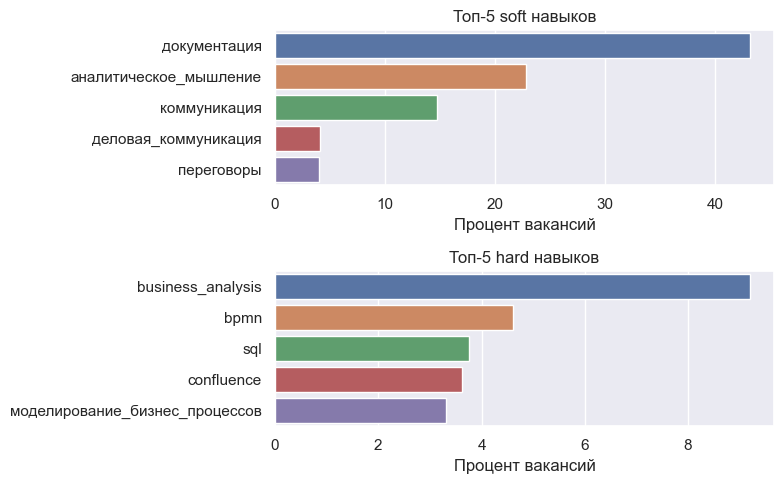

In [35]:
top_skills_plot(ba_df, ba_df['experience'])

## График основных навыков для ДА.

Теперь посмотрим на более характерные навыки для ДА.

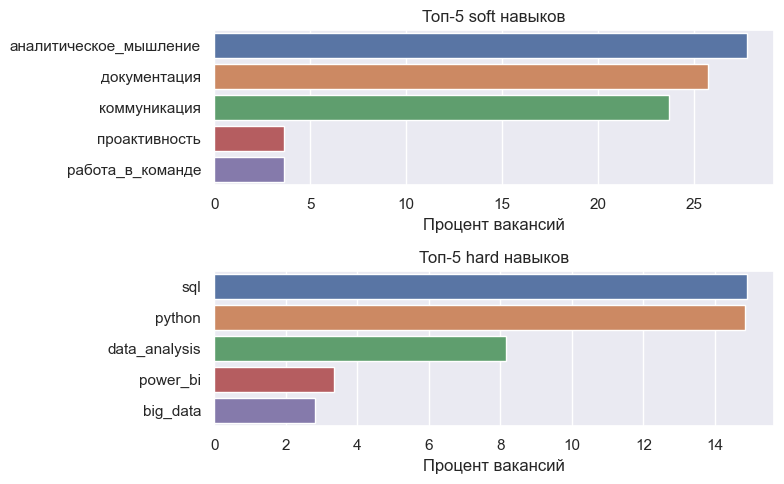

In [36]:
top_skills_plot(da_df, da_df['experience'])

__Комментарий:__  
Изучая графики, можно отметить, что основные soft навыки для бизнес-аналитиков и data-аналитиков в целом схожи, что подчеркивает общую актуальность этих навыков. Однако hard навыки значительно различаются: единственное общее требование — знание SQL. Бизнес-аналитики сосредотачиваются на улучшении и оптимизации процессов внутри организации, что требует владения инструментами для создания и оценки стратегий. В то время как data-аналитики ориентированы на работу с данными и их интерпретацию, используя различные языки програмирования и инструменты для обработки и визуализации информации. 

## Распределение вакансий по опыту работы для БА и ДА.

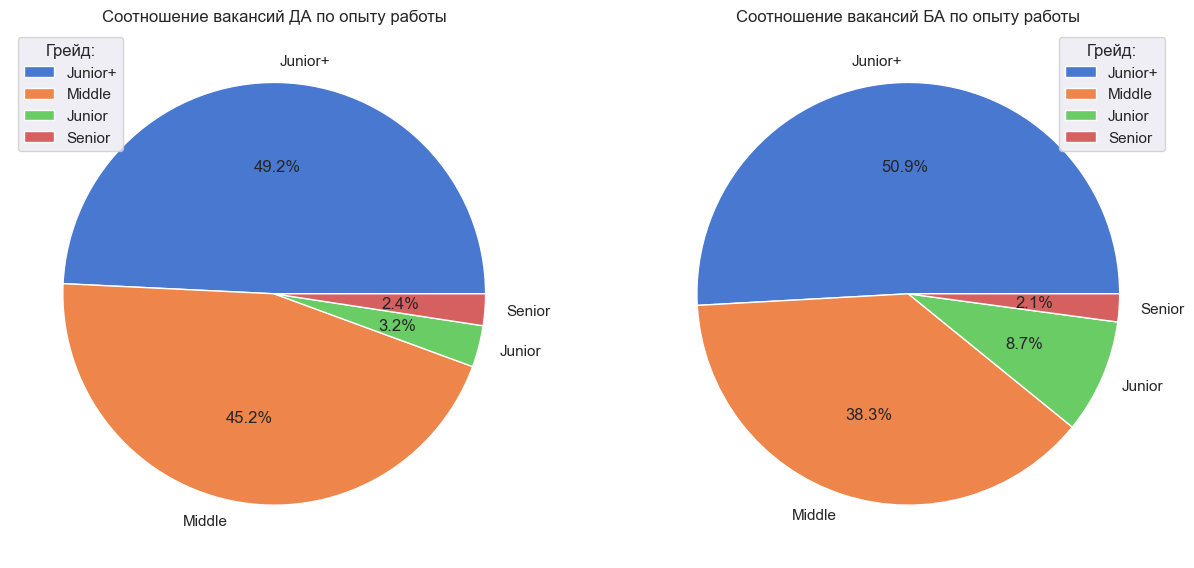

In [37]:
#устанавливаем палитру
sns.set_palette("muted")

plt.figure(figsize=(15, 15))

#первый график для da_df
ax1 = plt.subplot(1, 2, 1)
da_df.experience.value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    title='Соотношение вакансий ДА по опыту работы', 
    ax=ax1
)
plt.legend(title='Грейд:')
plt.ylabel('')

#второй график для ba_df
ax2 = plt.subplot(1, 2, 2)
ba_df.experience.value_counts().plot(
    kind='pie', 
    autopct='%.1f%%', 
    title='Соотношение вакансий БА по опыту работы', 
    ax=ax2
)
plt.legend(title='Грейд:')
plt.ylabel('')
plt.show()

Соотношение вакансий по опыту работы для ДА и БА примерно одинаковы. Около половины всех вакансий для аналитиков Junior+, за ними спрос на Middle-аналитиков. 

## Распределение вакансий по графику работы для БА и ДА.

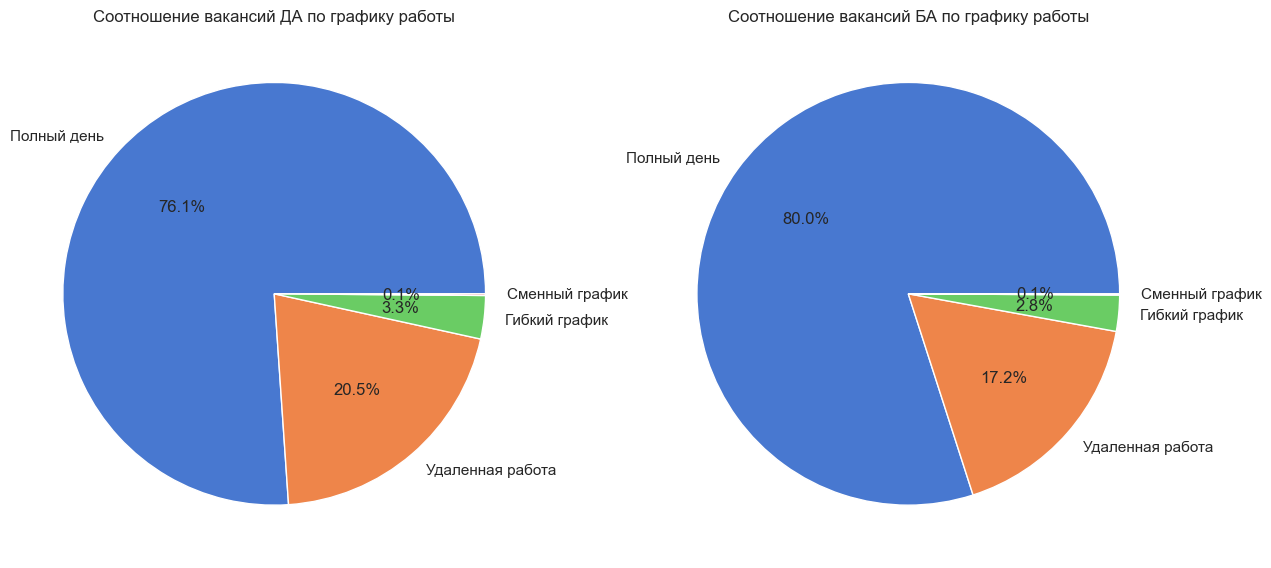

In [38]:
#устанавливаем палитру
sns.set_palette("muted")

plt.figure(figsize=(15, 15))

#первый график
ax1 = plt.subplot(1, 2, 1)
(da_df.schedule.value_counts().plot(
    autopct='%.1f%%', kind='pie', 
    title='Соотношение вакансий ДА по графику работы', 
    ax=ax1)
)
plt.ylabel('')

#второй график
ax2 = plt.subplot(1, 2, 2)
(ba_df.schedule.value_counts().plot(
    autopct='%.1f%%', kind='pie', 
    title='Соотношение вакансий БА по графику работы',
    ax=ax2)
)
plt.ylabel('')
plt.show()

Соотношение вакансий по графику работы для ДА и БА также примерно одинаковы. Около 80% всех предлагаемых вакансий с графиком на полный рабочий день, около 20% на удаленку.

## Распределение вакансий по регионам

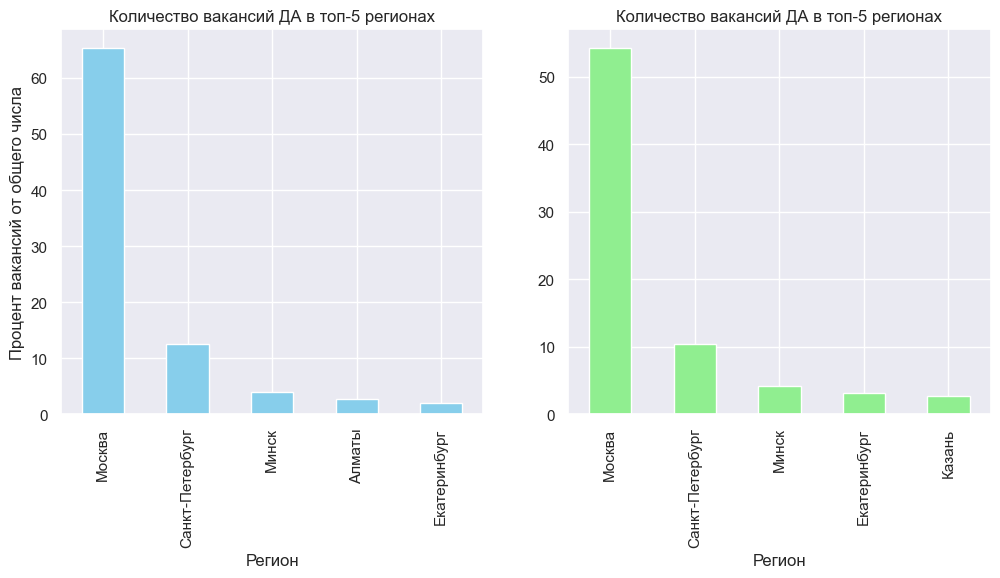

In [39]:
#подсчет количества вакансий по каждому региону и выбор топ-5
top_5_da_areas = da_df['area'].value_counts().nlargest(5)
top_5_ba_areas = ba_df['area'].value_counts().nlargest(5)
#подсчет общего количества вакансий
total_da_vacancies = da_df['area'].count()
total_ba_vacancies = ba_df['area'].count()
#расчет процента для каждой из топ-5 категорий
top_5_da_percentage = (top_5_da_areas / total_da_vacancies) * 100
top_5_ba_percentage = (top_5_ba_areas / total_ba_vacancies) * 100
#построение столбчатого графика
plt.figure(figsize=(12, 5))
#первый график для da_df
ax1 = plt.subplot(1, 2, 1)
top_5_da_percentage.plot(kind='bar', ax=ax1, color='skyblue')
plt.title('Количество вакансий ДА в топ-5 регионах')
plt.xlabel('Регион')
plt.ylabel('Процент вакансий от общего числа')
#второй график для ba_df
ax2 = plt.subplot(1, 2, 2)
top_5_ba_percentage.plot(kind='bar', ax=ax2, color='lightgreen')
plt.title('Количество вакансий ДА в топ-5 регионах')
plt.xlabel('Регион')
plt.ylabel;

Аналитиков обоих направлений чаще всего ищут в Москве, СПб и Минске.

## Распределение вакансий по городам для различных работодателей. 

Рассмотрим также распределение вакансий по городам для различных работодателей, что поможет в понимании популярности компаний в разных регионах.

In [40]:
def reg_emp_pivot(data):
    #выделим топ-10 работодателей
    top_employers = data.employer.value_counts().nlargest(10).index.tolist()
    #выделим топ-5 регионов
    top_regions = data.area.value_counts().nlargest(5).index.tolist()
    #сделаем сводную таблицу
    data_pivot = pd.pivot_table(data=data[data.employer.isin(top_employers) &  data.area.isin(top_regions)],
                          index='employer',
                          columns='area',
                          values='id',
                          aggfunc='count',
                          fill_value=0)
    display(data_pivot.style.background_gradient(cmap='Blues', vmin=data_pivot.min().min(),
                                                 vmax=data_pivot.max().max()))

### Распределение вакансий для БА по городам для различных работодателей. 

In [41]:
reg_emp_pivot(ba_df)

area,Екатеринбург,Казань,Минск,Москва,Санкт-Петербург
employer,,,,,
Aston,5,5,0,6,6
Ozon,0,1,0,33,1
Банк ВТБ (ПАО),0,0,0,84,3
"Иннотех, Группа компаний",0,1,0,29,2
Комус,0,0,0,35,0
"МАГНИТ, Розничная сеть",0,0,0,12,4
ПСБ (ПАО «Промсвязьбанк»),0,0,0,30,0
СБЕР,1,0,0,45,2
Т1,0,0,0,29,3


Здесь видно, что двумя ведущими работодателями по вакансиям для бизнес-аналитиков являются банки СБЕР и ВТБ, и ищут они аналитиков в Москве, вероятно для своих головных офисов. Другие работодатели, такие как Комус, Ozon и Иннотех, также имеют заметное количество вакансий, но все-таки уступают лидерам. В регионах, таких как Минск, Екатеринбург и Казань, количество вакансий остается низким, с несколькими единичными предложениями.

### Распределение вакансий для ДА по городам для различных работодателей. 

In [42]:
reg_emp_pivot(da_df)

area,Алматы,Екатеринбург,Минск,Москва,Санкт-Петербург
employer,,,,,
Playrix,1,0,1,4,4
USETECH,0,0,0,5,3
WILDBERRIES,0,0,0,31,1
«UZUM TECHNOLOGIES».,0,0,0,6,1
КАЗАНЬЭКСПРЕСС,0,0,0,2,5
"МАГНИТ, Розничная сеть",0,0,0,5,1
МТС,0,0,0,32,0
РОСБАНК,0,0,0,8,0
Райффайзен Банк,0,0,0,9,0


В этом списке работодателей для аналитиков данных СБЕР, WILDBERRIES и МТC значительно опережают остальных по количеству вакансий, большинство из них также расположено в Москве. В Санкт-Петербурге также есть вакансии у нескольких компаний, таких как СБЕР, КАЗАНЬЭКСПРЕСС, Playrix и USETECH, но их общее число значительно ниже, чем в столице. В других регионах, включая Алматы и Екатеринбург, количество вакансий остается минимальным.

## Выводы.
Работа по предобработке и анализу данных позволила сформировать общее представление о рынке труда для бизнес и data аналитиков, выявить ключевые навыки и предложения работодателей, а также подготовить данные для дальнейшего углубленного анализа.

- Всего в датасете было представлено 4171 вакансия для БА и 876 для ДА. Датасет был очищен от колонок, которые не будут использоваться в дальнейшем анализе, таких как ссылки на вакансии и тип вакансий. Также удалены столбцы с навыками и описаниями вакансий, поскольку информация из этих полей была обработана. Пропуски в категориальных столбцах были заменены пробелами, а также использованы заглушки для пропусков в столбцах с зарплатой и департаментами. Навыки были переработаны и разбиты по столбцам soft и hard навыков для более детального анализа.

- Основные работодатели — Банк ВТБ, Aston и Сбер, а преобладающее количество вакансий сосредоточено в Москве. Наиболее востребованы Junior+ и Middle аналитики с графиком работы «полный день». Соотношение вакансий по опыту работы и графику работы для обеих профессий схоже. Около 80% вакансий предлагает полный рабочий день, и большинство из них сосредоточено в крупных городах, таких как Москва и Санкт-Петербург. Построенные графики показали, что основные soft навыки для БА и ДА схожи, подчеркивая их общую актуальность. В то же время hard навыки значительно различаются: бизнес-аналитики сосредоточены на оптимизации процессов, тогда как data-аналитики работают с данными и их визуализацией.

# Определение наиболее желаемых кандидатов на вакансии ДА и БА.

Теперь посмотрим на наиболее востребованных кандидатов по soft и hard навыкам с учетом грейдов.

## Топ навыков для БА с учетом грейда.

### Топ навыков для Junior БА.

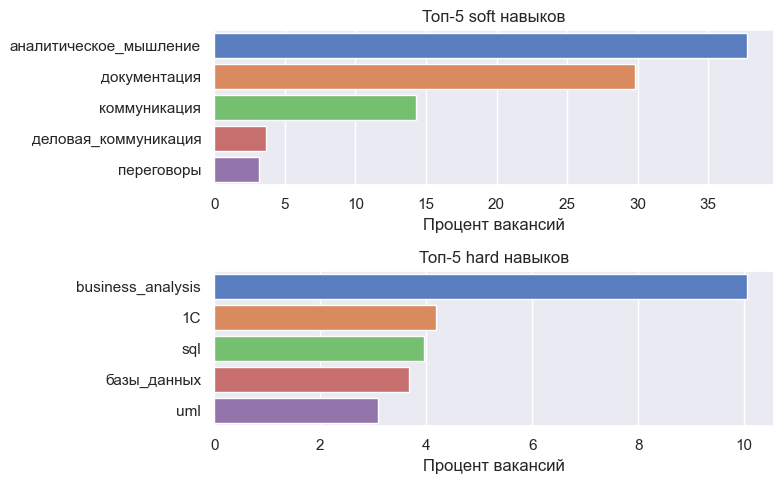

In [43]:
top_skills_plot(ba_df, 'Junior')

### Топ навыков для Junior+ БА.

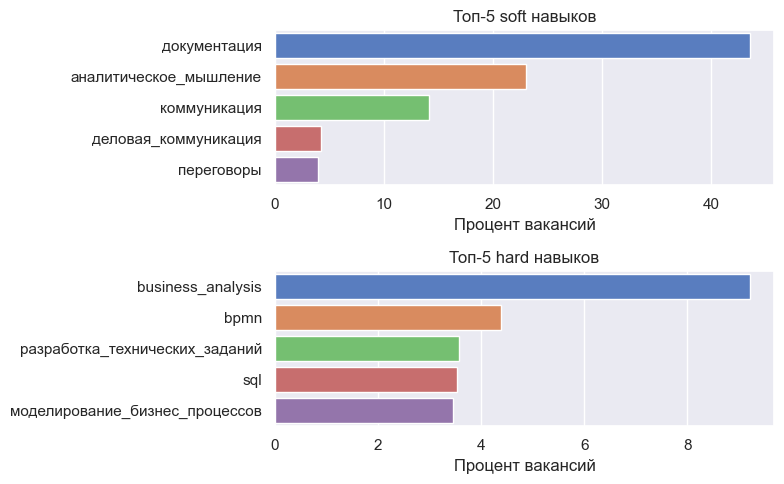

In [44]:
top_skills_plot(ba_df, 'Junior+')

### Топ навыков для Middle БА.

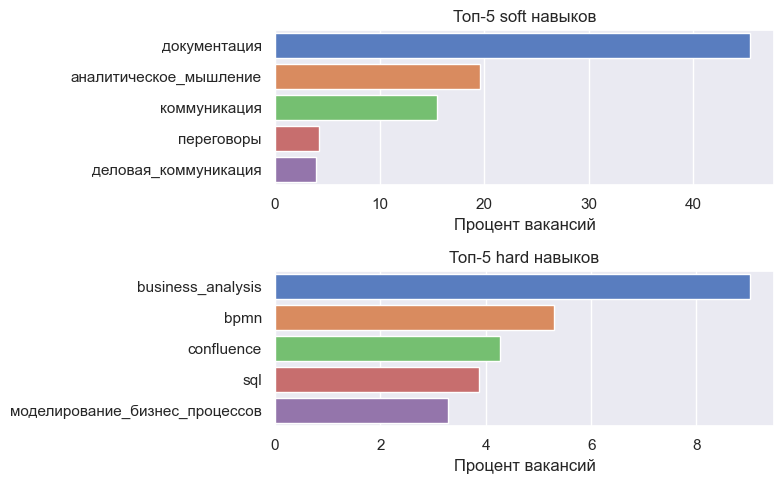

In [45]:
top_skills_plot(ba_df, 'Middle')

### Топ навыков для Senior БА.

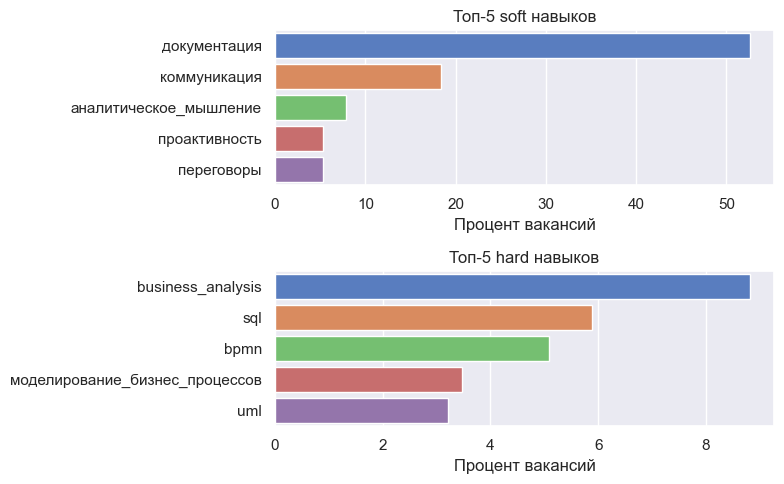

In [46]:
top_skills_plot(ba_df, 'Senior')

### Вывод.
Требования к soft навыкам для бизнес-аналитиков практически не различаются по грейдам: везде важны навыки работы с документацией, аналитическое мышление и умение эффективно общаться. Лишь на уровне senior добавляется необходимость навыков управления командой.

Что касается hard навыков, ситуация также схожа для всех уровней: ключевыми остаются бизнес-анализ и SQL. Однако, junior специалисты выделяются тем, что в их топ-5 присутствуют знание 1С и опыт работы с большими объемами данных, в отличие от BPMN и моделирования бизнес-процессов, которые характерны для более высоких грейдов.

## Топ навыков для ДА с учетом грейда.

### Топ навыков для Junior ДА.

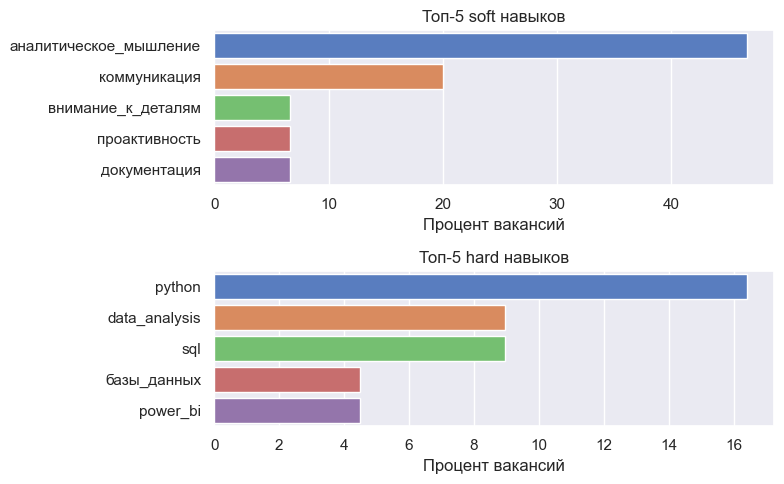

In [47]:
top_skills_plot(da_df, 'Junior')

### Топ навыков для Junior ДА.

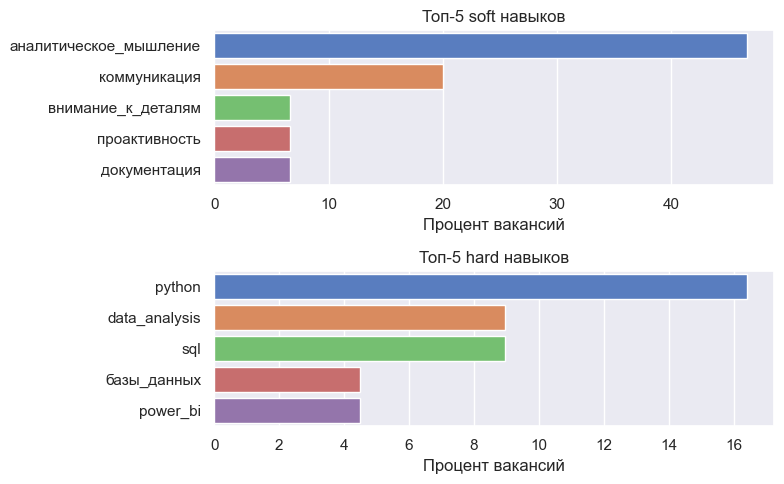

In [48]:
top_skills_plot(da_df, 'Junior')

### Топ навыков для Junior ДА.

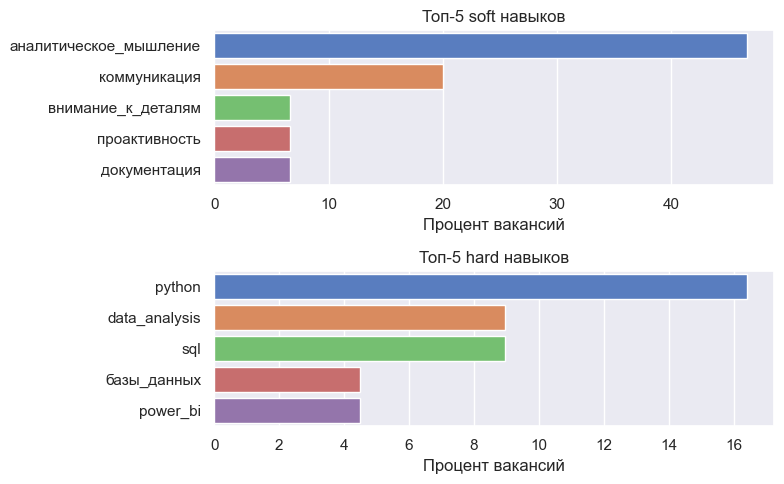

In [49]:
top_skills_plot(da_df, 'Junior')

### Топ навыков для Junior ДА.

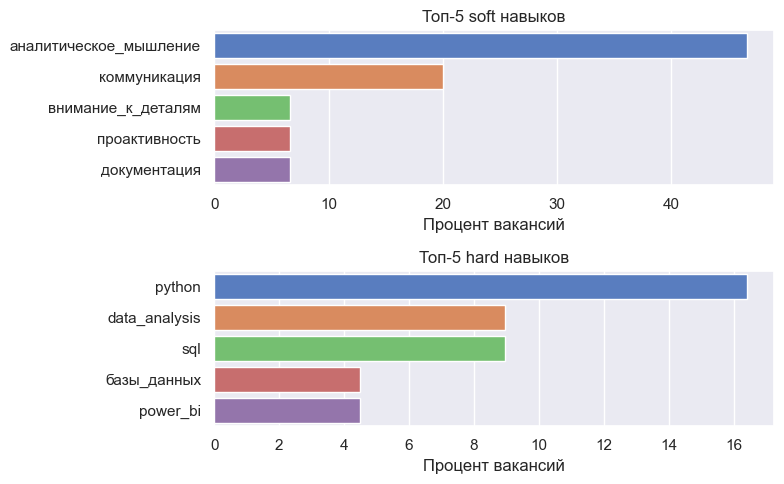

In [50]:
top_skills_plot(da_df, 'Junior')

### Вывод.
Как и в области бизнес-анализа, ключевые soft навыки для специалистов в области анализа данных (ДА) остаются схожими на всех уровнях: аналитическое и критическое мышление, эффективная коммуникация и навыки ведения документации необходимы на всех этапах. Однако для позиций junior особое внимание уделяется проактивности, тогда как на уровне middle акцент делается на способности принимать решения. Senior специалисты, в свою очередь, должны обладать навыками презентации результатов своей работы.

Тремя основными hard навыками, требуемыми для всех грейдов в DА, являются Python, SQL и анализ данных. Для junior и junior+ важными также являются навыки работы с Power BI, а также знания математической статистики и Excel. Middle-специалисты тоже должны уметь работать с Power BI. На уровне senior вакансии отличаются тем, что помимо основных трех навыков требуется знание юнит-экономики и умение проводить A/B тесты.

# Определение типичного места работы.

Далее я рассмотрю типичные места работы для специалистов в области анализа данных и бизнес-анализа по следующим параметрам: топ работодателей, зарплата, тип занятости и график работы.  
Подготовим функцию, которая будет выводить 4 графика для заданного грейда и области в аналитике.

In [51]:
def сharplots(name, df, exp):
    print('')
    print('                       Типичные характеристики вакансий для', name, 'грейда', exp)
    print('')
    
    plt.figure(figsize=(20, 15))
    bar_colors = ['#17becf', '#9467bd', '#bcbd22', '#e377c2', '#8c564b']
    

    
    ax1 = plt.subplot(2, 2, 1)
    ((df.query('experience == @exp')['salary_bin'] 
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=35,              
           grid=True,
           color=bar_colors,
           ax=ax1)
    )    
    plt.title('Диапазон зарплат')
    plt.ylabel('Процент вакансий')
    
    ax2 = plt.subplot(2, 2, 2)    
    ((df.query('experience == @exp')['employer']
     .value_counts(normalize=True)*100)
    .head()
    .plot(kind='bar',
          rot=35,
          grid=True,
          color=bar_colors,
          ax=ax2)
    )  
    plt.title('Ведущие работодатели')
    plt.ylabel('Процент вакансий')
    
    ax3 = plt.subplot(2, 2, 3)
    ((df.query('experience == @exp')['employment']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=35,              
           grid=True,
           color=bar_colors,
           ax=ax3)
    )    
    plt.title('Тип занятости')
    plt.ylabel('Процент вакансий')
    
    ax4 = plt.subplot(2, 2, 4)
    ((df.query('experience == @exp')['schedule']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=35,
           grid=True,
           color=bar_colors,
           ax=ax4)
    )    
    plt.title('График работы')
    plt.ylabel('Процент вакансий')
    
    plt.subplots_adjust(wspace=.15, hspace=.50)
    plt.show()


## Вакансии для бизнес-аналитиков

### Типичное место работы Junior БА.


                       Типичные характеристики вакансий для БА грейда Junior



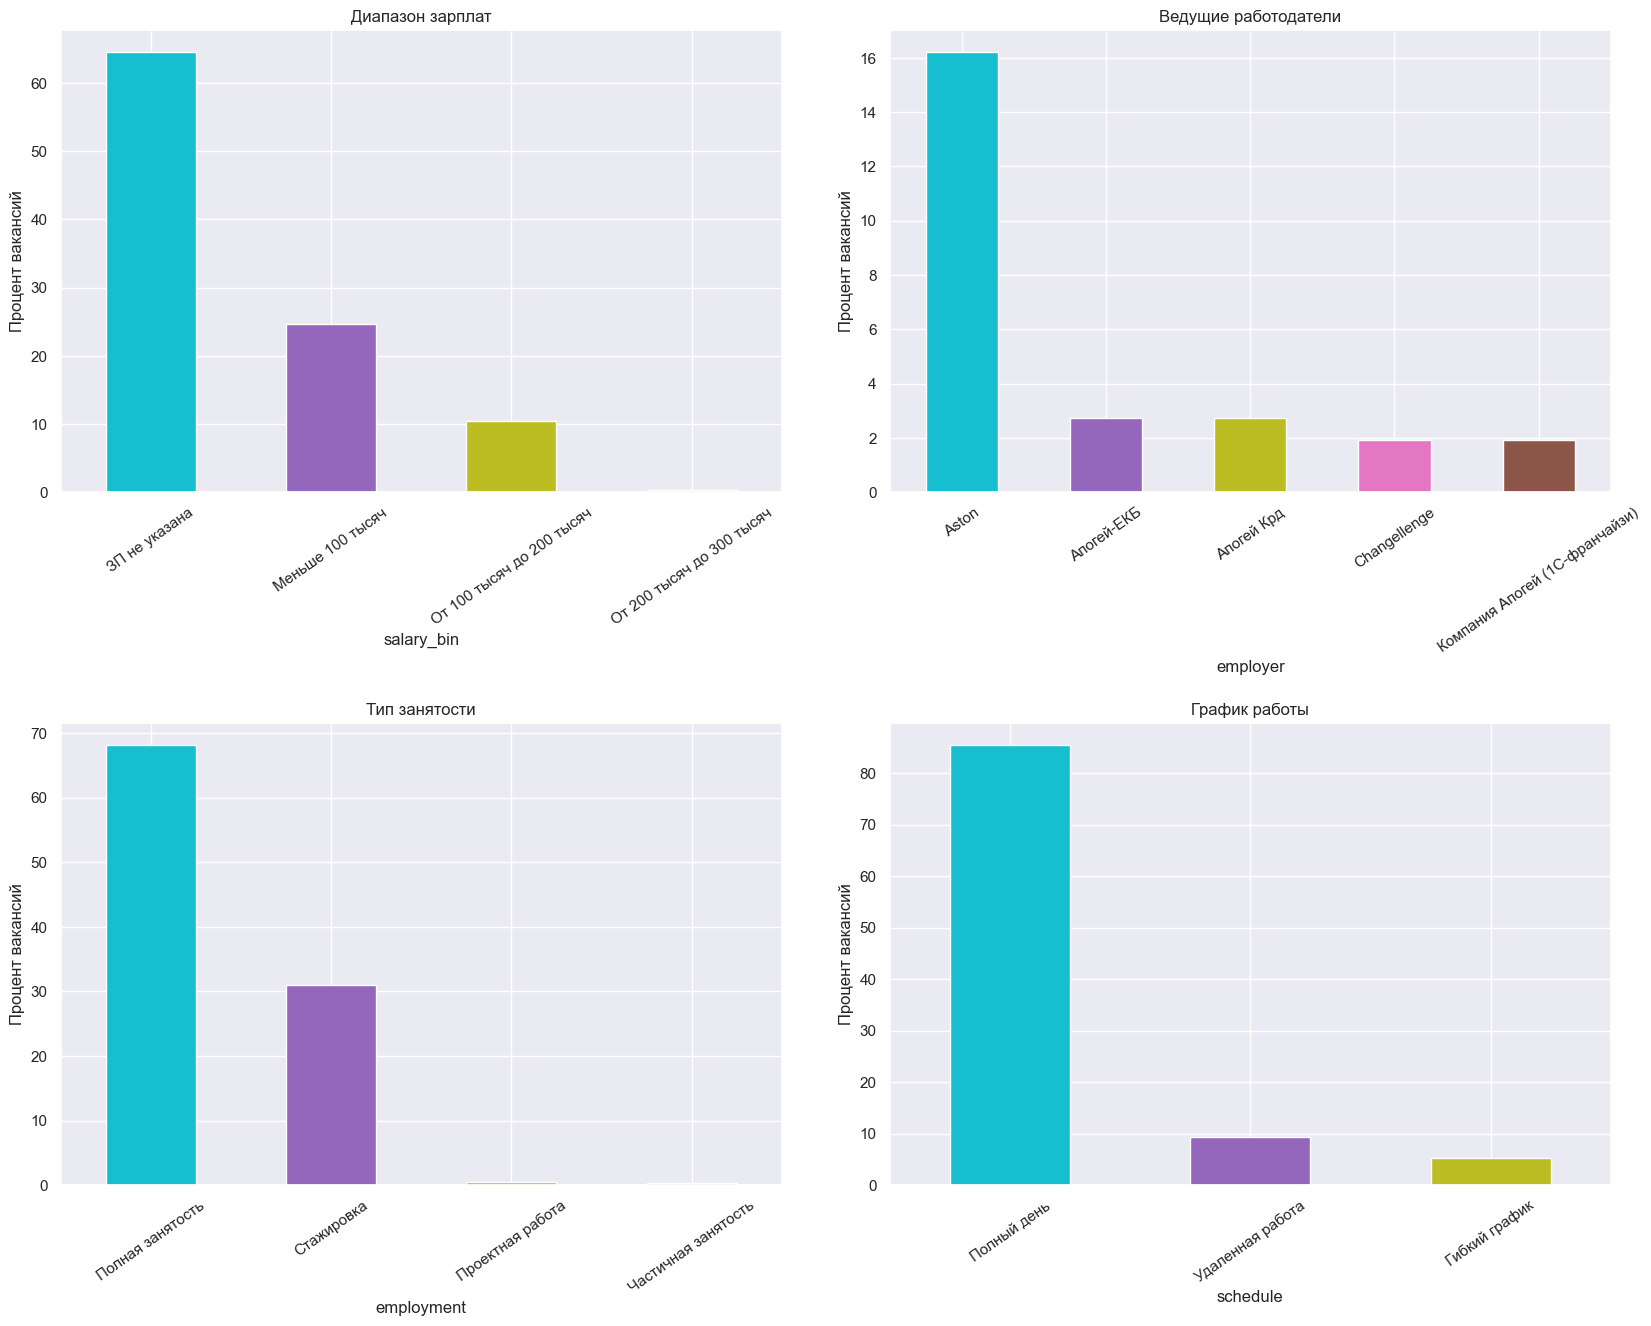

In [52]:
сharplots('БА', ba_df, 'Junior')

- __Диапазон зарплат.__ Почти 25% вакансий предлагают зарплату до 100 тыс. руб., при этом более 60% вакансий не указывают зарплату, и лишь около 10% вакансий имеют диапазон от 100 до 200 тыс. руб.

- __Ведущие работодатели.__ Наибольшее количество вакансий для Junior специалистов предлагается компанией Aston -  около 16% от общего числа, а также в группе компаний Апогей, где их доля составляет около 10%.

- __Тип занятости.__ Самым популярным типом занятости является полная занятость (почти 70%), в то время как чуть более 30% вакансий предлагают стажировки.

- __График работы.__ Полный день у 80% вакансий, около 10% вакансий предлагают возможность удаленной работы, и 5% — гибкий график.

### Типичное место работы Junior+ БА.


                       Типичные характеристики вакансий для БА грейда Junior+



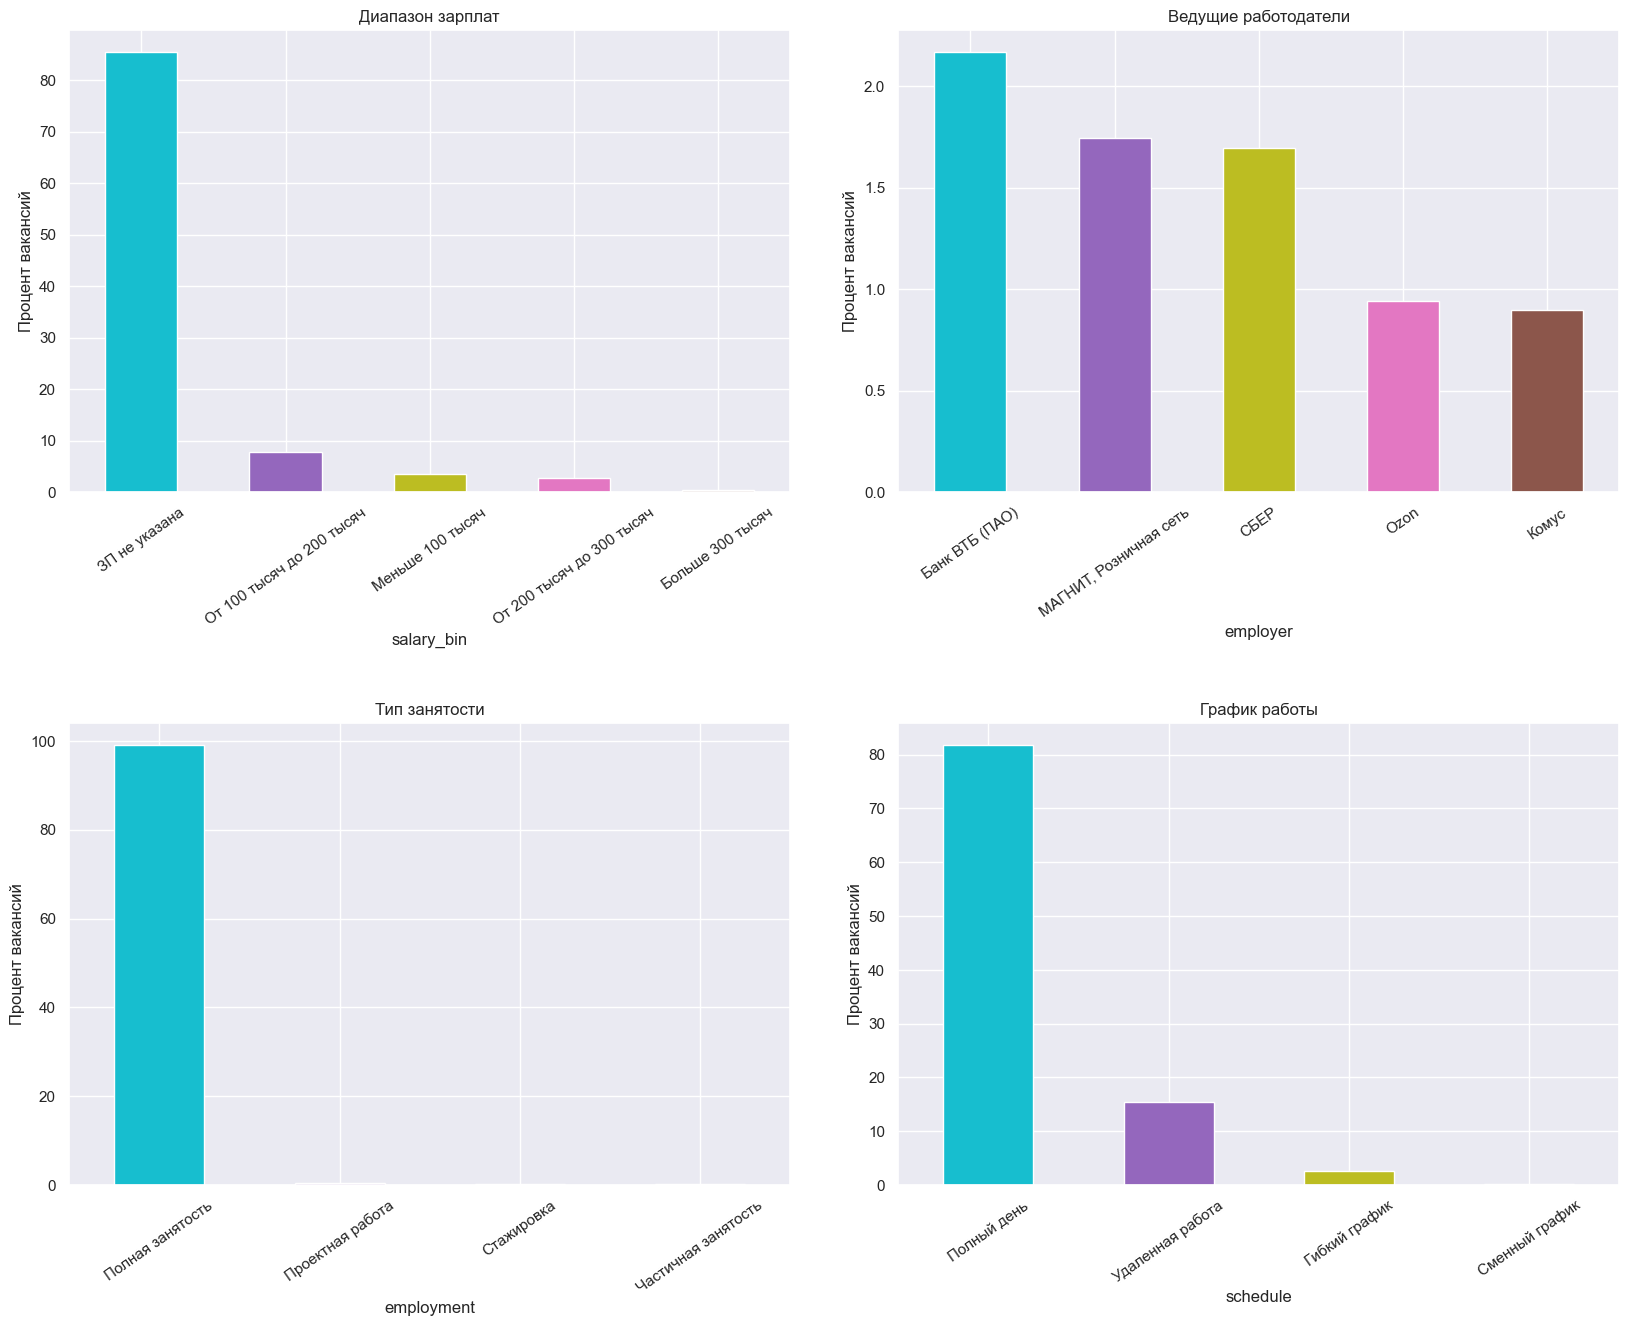

In [53]:
сharplots('БА', ba_df, 'Junior+')

__Диапазон зарплат__. В данной категории специалистов уже в 85% вакансий отсутствует указание на зарплату. В основном, зарплата равняется 100-200 тыс. руб., реже встречаются предложения менее 100 тыс.

__Ведущие работодатели.__ Наибольшее количество вакансий для специалистов этого грейда предлагают: Банк ВТБ, Магнит, СБЕР, Ozon, Комус (примерно 1%-2% вакансий от каждого работодателя).

__Тип занятости.__ Практически все вакансии предполагают полную занятость.

__График работы.__ Есть увеличение доли вакансий с удаленной работой до 15% по сравнению с Junior специалистами.

### Типичное место работы Middle БА.


                       Типичные характеристики вакансий для БА грейда Middle



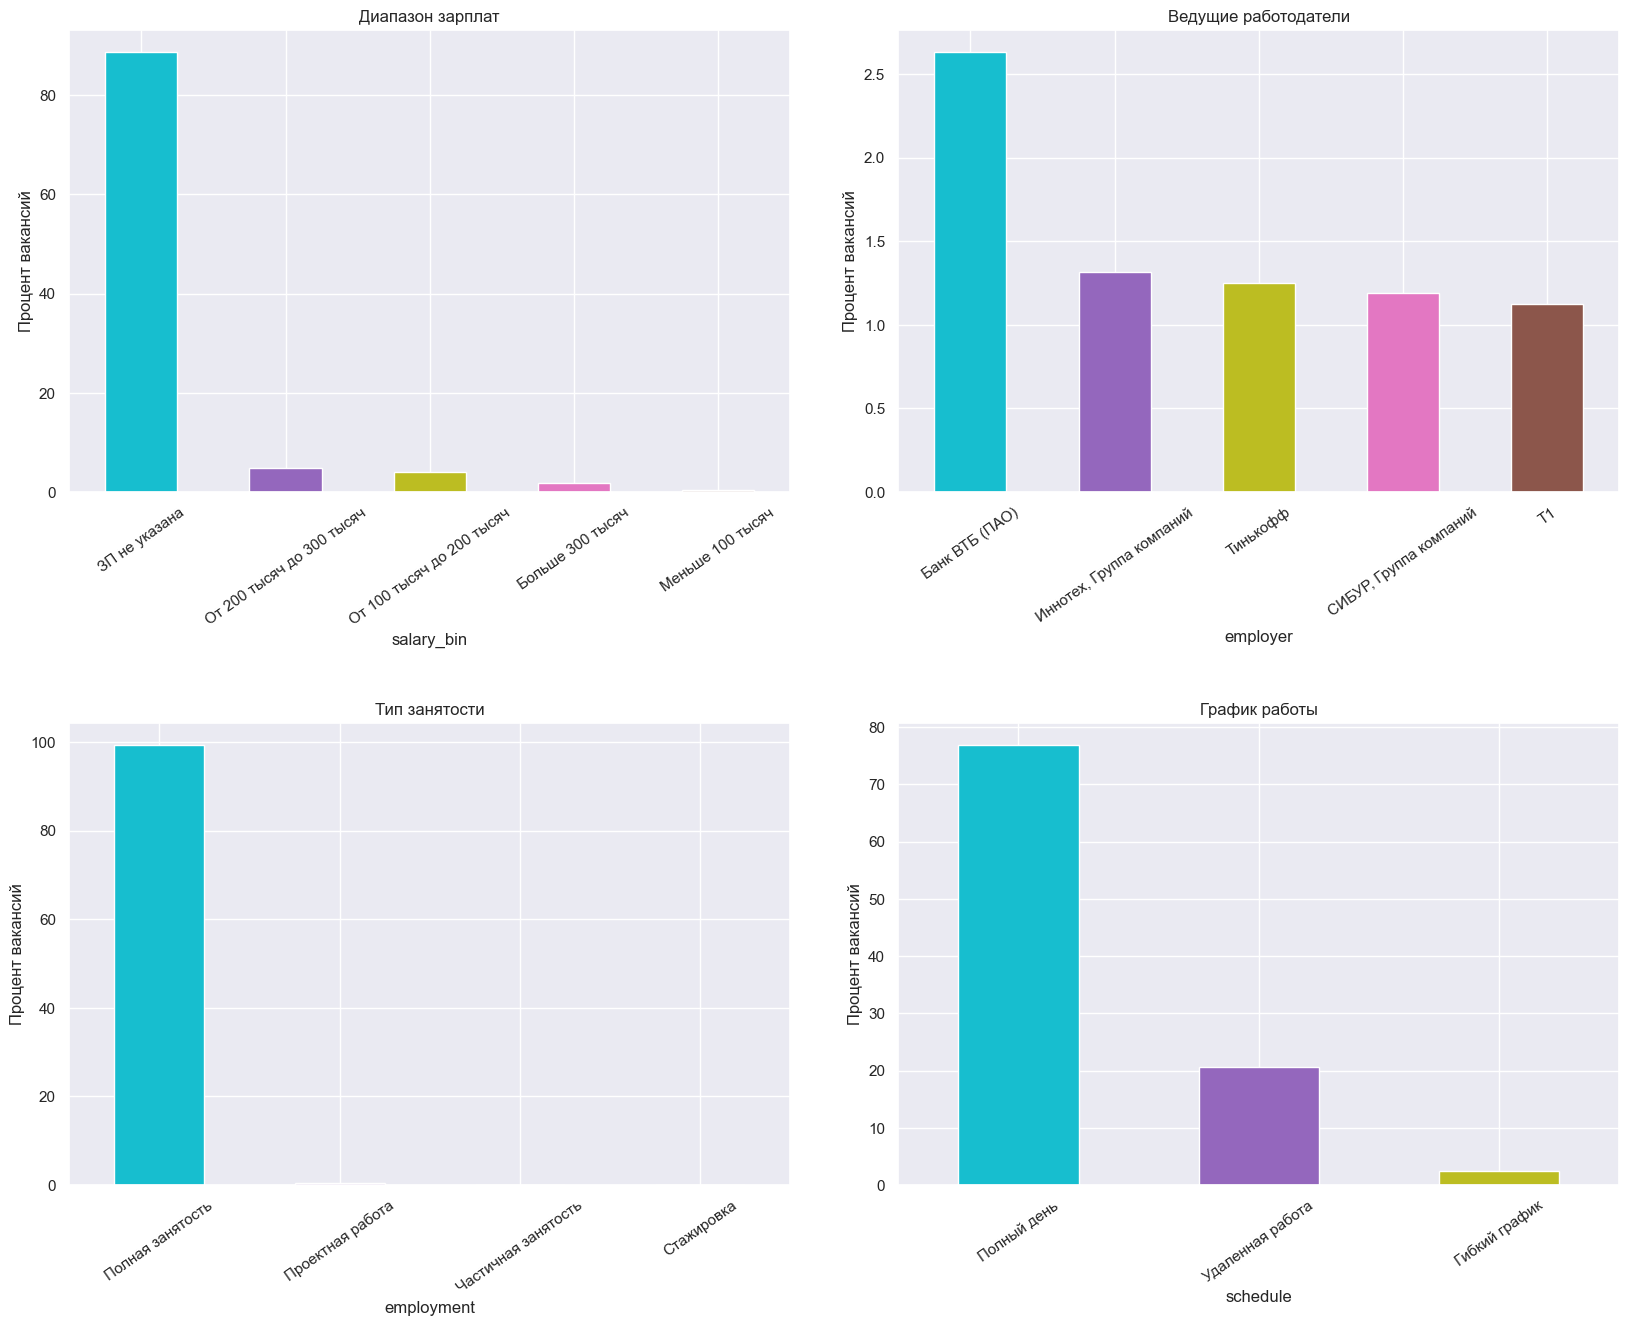

In [54]:
сharplots('БА', ba_df, 'Middle')

__Диапазон зарплат.__ Здесь уже наибольшее количество предложений приходится на диапазон 200-300 тыс. руб. Также можно заметить рост числа вакансий, в которых зарплата не указана, по сравнению с другими диапазонами. 

__Ведущие работодатели.__ Лидером по числу вакансий по-прежнему остается Банк ВТБ (более 2.5% от общего числа), а за ним следуют Иннотех, Тинькофф, СИБУР и Т1, у каждого из которых примерно 1.3% вакансий.

__Тип занятости.__ Практически все вакансии предполагают полную занятость.

__График работы.__ Число вакансий с удаленной работой продолжает расти -  уже более 20%.

### Типичное место работы Senior  БА.


                       Типичные характеристики вакансий для БА грейда Senior



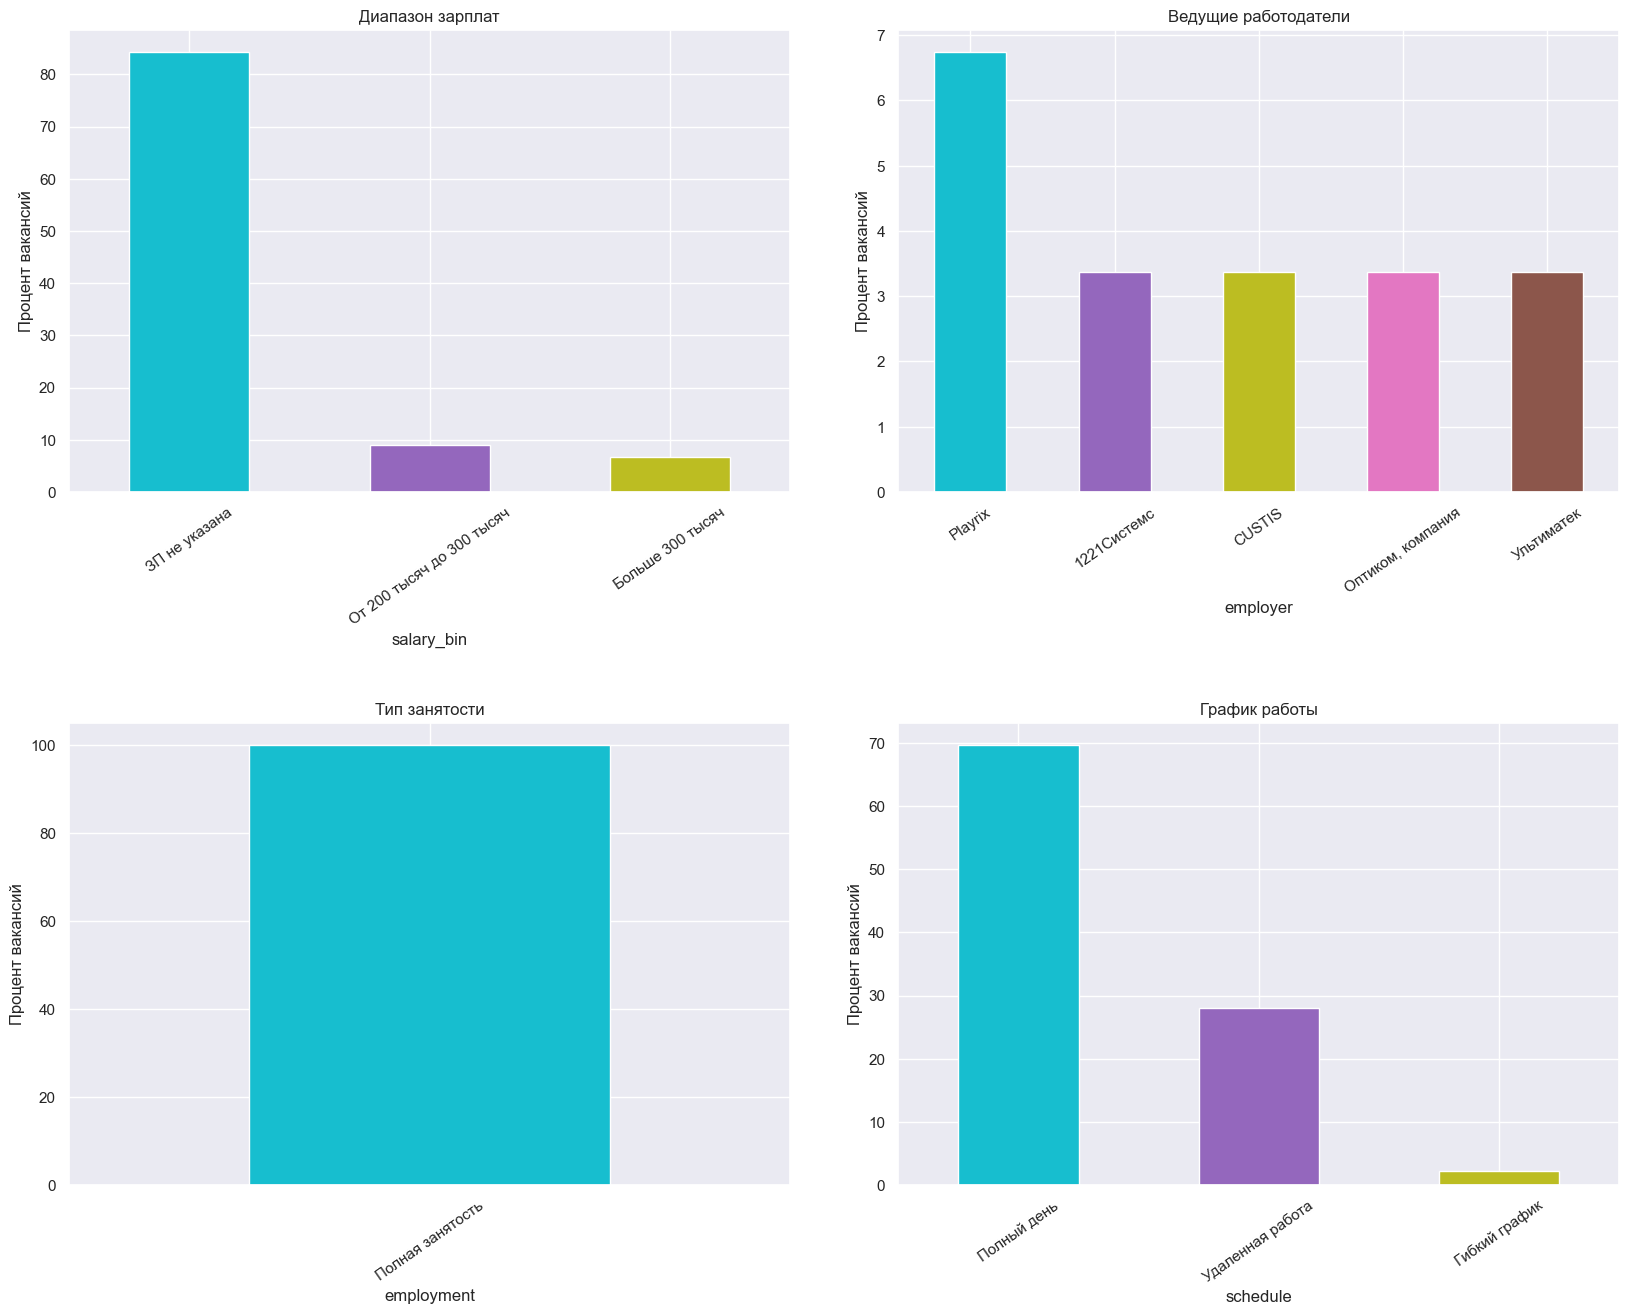

In [55]:
сharplots('БА', ba_df, 'Senior')

__Диапазон зарплат.__ В основном (около 10%) указанная зарплата для вакансий грейда Senior составляет 200-300 тыс. руб., не многим меньше - около 8% предлагает зарплату более 300 тыс. руб. Предложения с зарплатой менее 100 тыс. руб. для грейда Senior отсутствуют полностью.
__Ведущие работодатели.__ Ситуация на этом уровне изменилась: в списке ведущих работодателей больше нет банков, магазинов и маркетплейсов. Senior специалистов активно ищут IT-компании, среди которых: Playrix - почти 7% вакансий. 1221Системс, CUSTIS, Опитиком и Ультиматек около 3.5% вакансий каждая.

__Тип занятости.__ Вакансии представлены только с полной занятостью.

__График работы.__ Senior специалисты обладают наибольшим числом вакансий с возможностью удаленной работы, доля которых составляет почти 30%.

## Вакансии для аналитиков данных

### Типичное место работы Junior ДА.


                       Типичные характеристики вакансий для ДА грейда Junior



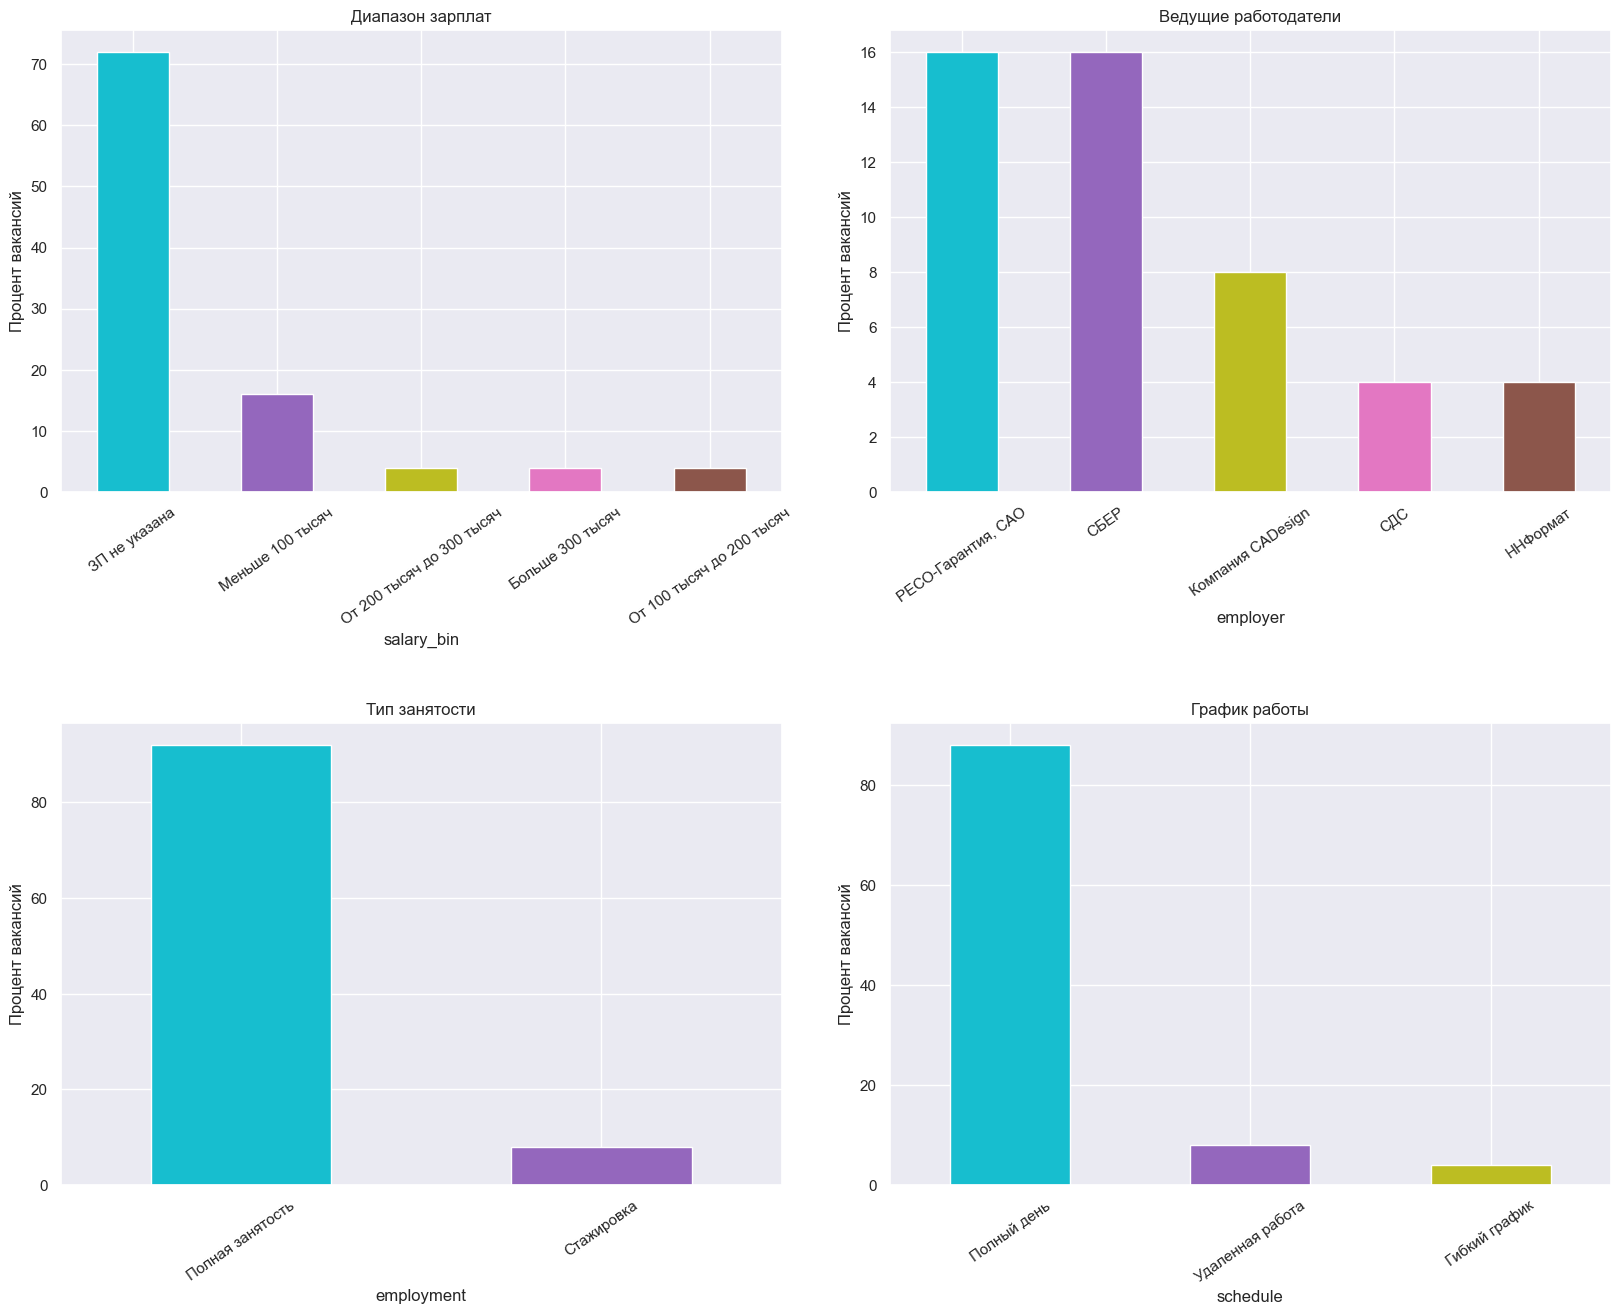

In [56]:
сharplots('ДА', da_df, 'Junior')

__Диапазон зарплат.__ Примерно 70% вакансий не указывают уровень зарплаты. В большинстве случаев Junior специалистам предлагается заработная плата до 100 тыс. руб., что составляет около 16% от общего числа вакансий.

__Ведущие работодатели.__ Наибольшее количество вакансий для Junior специалистов предлагают компании СБЕР и РЕСО-Гарантия, каждая из которых занимает по 16% рынка.

__Тип занятости.__ Самым распространенным типом занятости является полная занятость - около 90% вакансий. Почти 10%  предлагают стажировку.

__График работы.__ Только около 7% вакансий предлагают возможность удаленной работы, и еще меньшее количество – гибкий график.

### Типичное место работы Junior+ ДА.


                       Типичные характеристики вакансий для ДА грейда Junior+



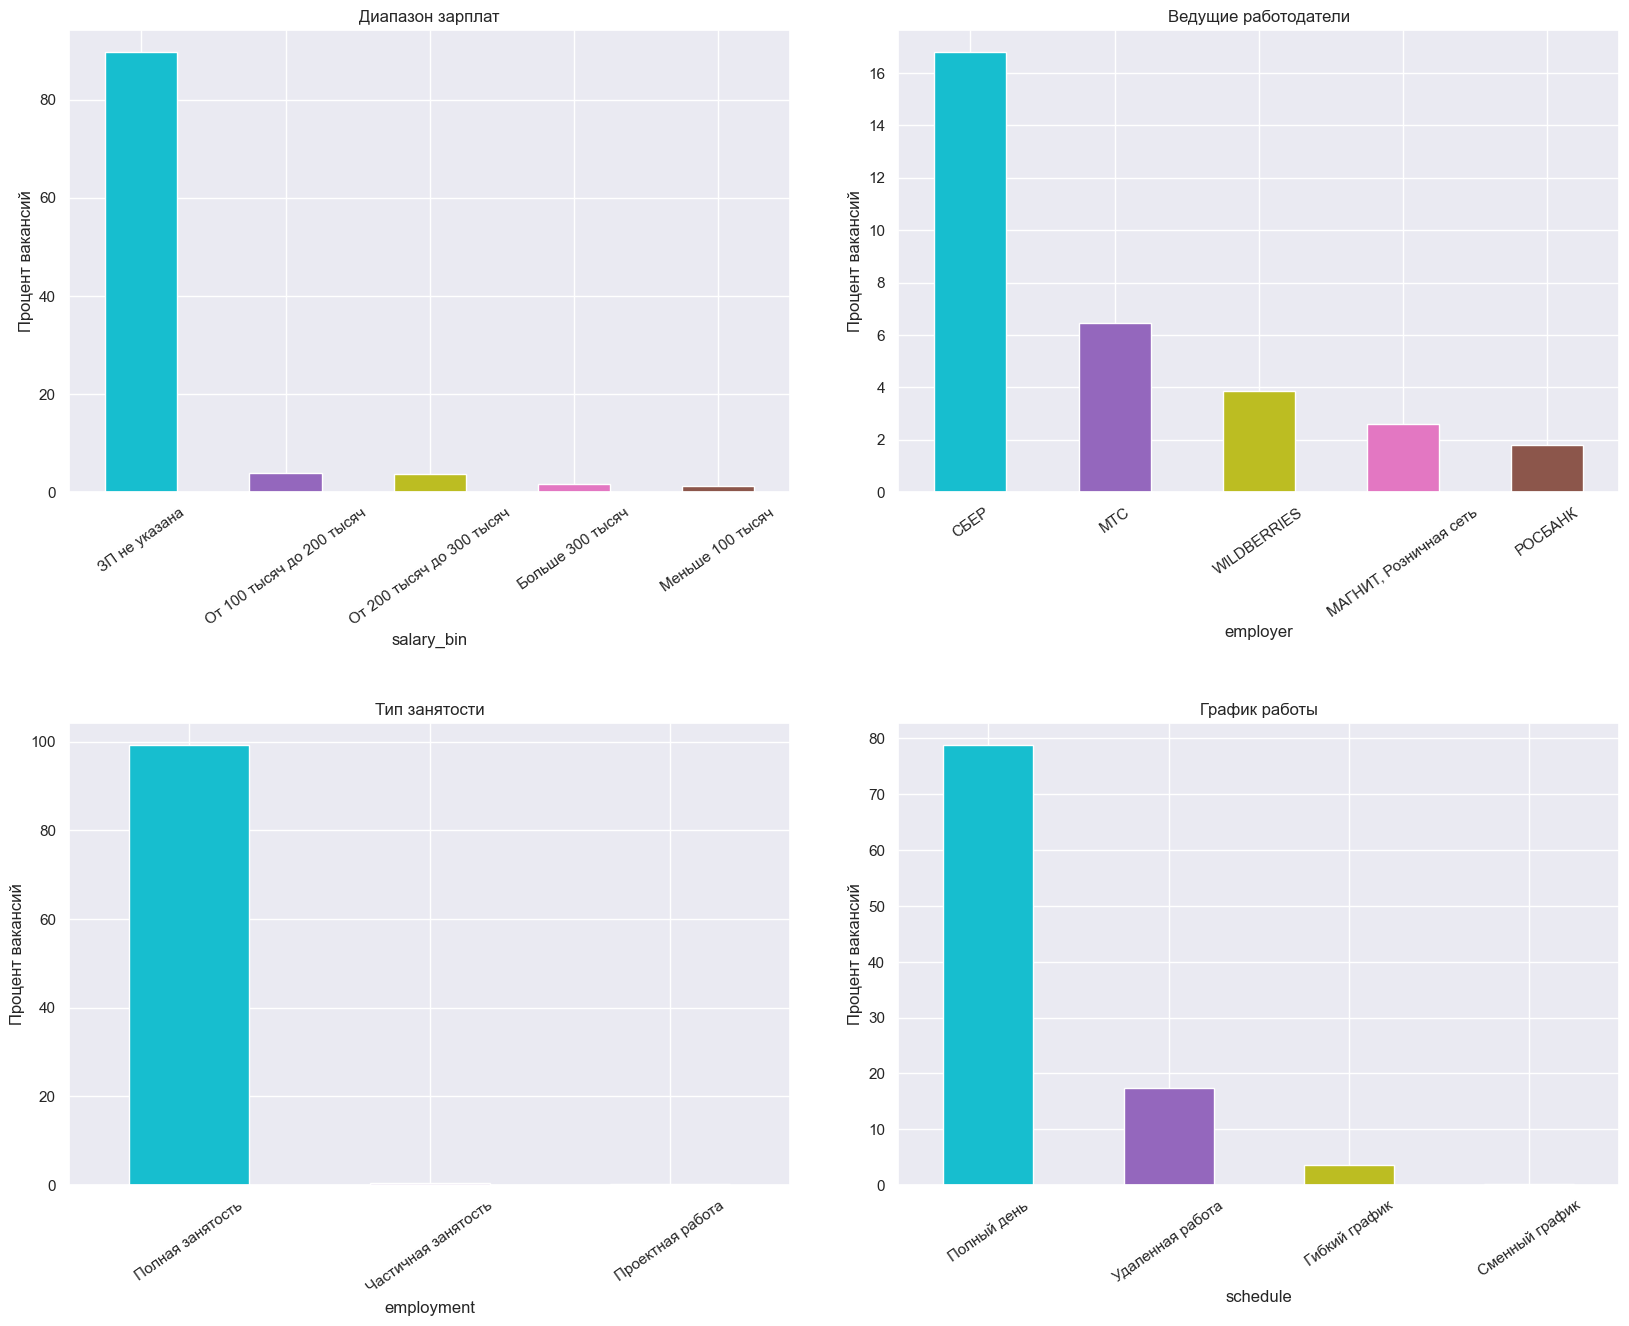

In [57]:
сharplots('ДА', da_df, 'Junior+')

__Диапазон зарплат.__ В почти 90%(это 348 из 387 вакансий) вакансий   уровень зарплаты не указан, что делает выборку оставшихся значений слишком малой для анализа. Однако, если рассматривать только доступные данные, можно предположить, что в основном зарплата для специалистов данного грейда составляет примерно 100-200 тыс. руб.

__Ведущие работодатели.__ Наибольшее количество вакансий для специалистов этого уровня предлагает СБЕР, который занимает около 16% рынка.

__Тип занятости.__ Почти все вакансии предполагают полную занятость, достигая 100%.

__График работы.__ Количество вакансий с возможностью удаленной работы для данного грейда уже составляет почти 20%.

### Типичное место работы Middle ДА.


                       Типичные характеристики вакансий для ДА грейда Middle



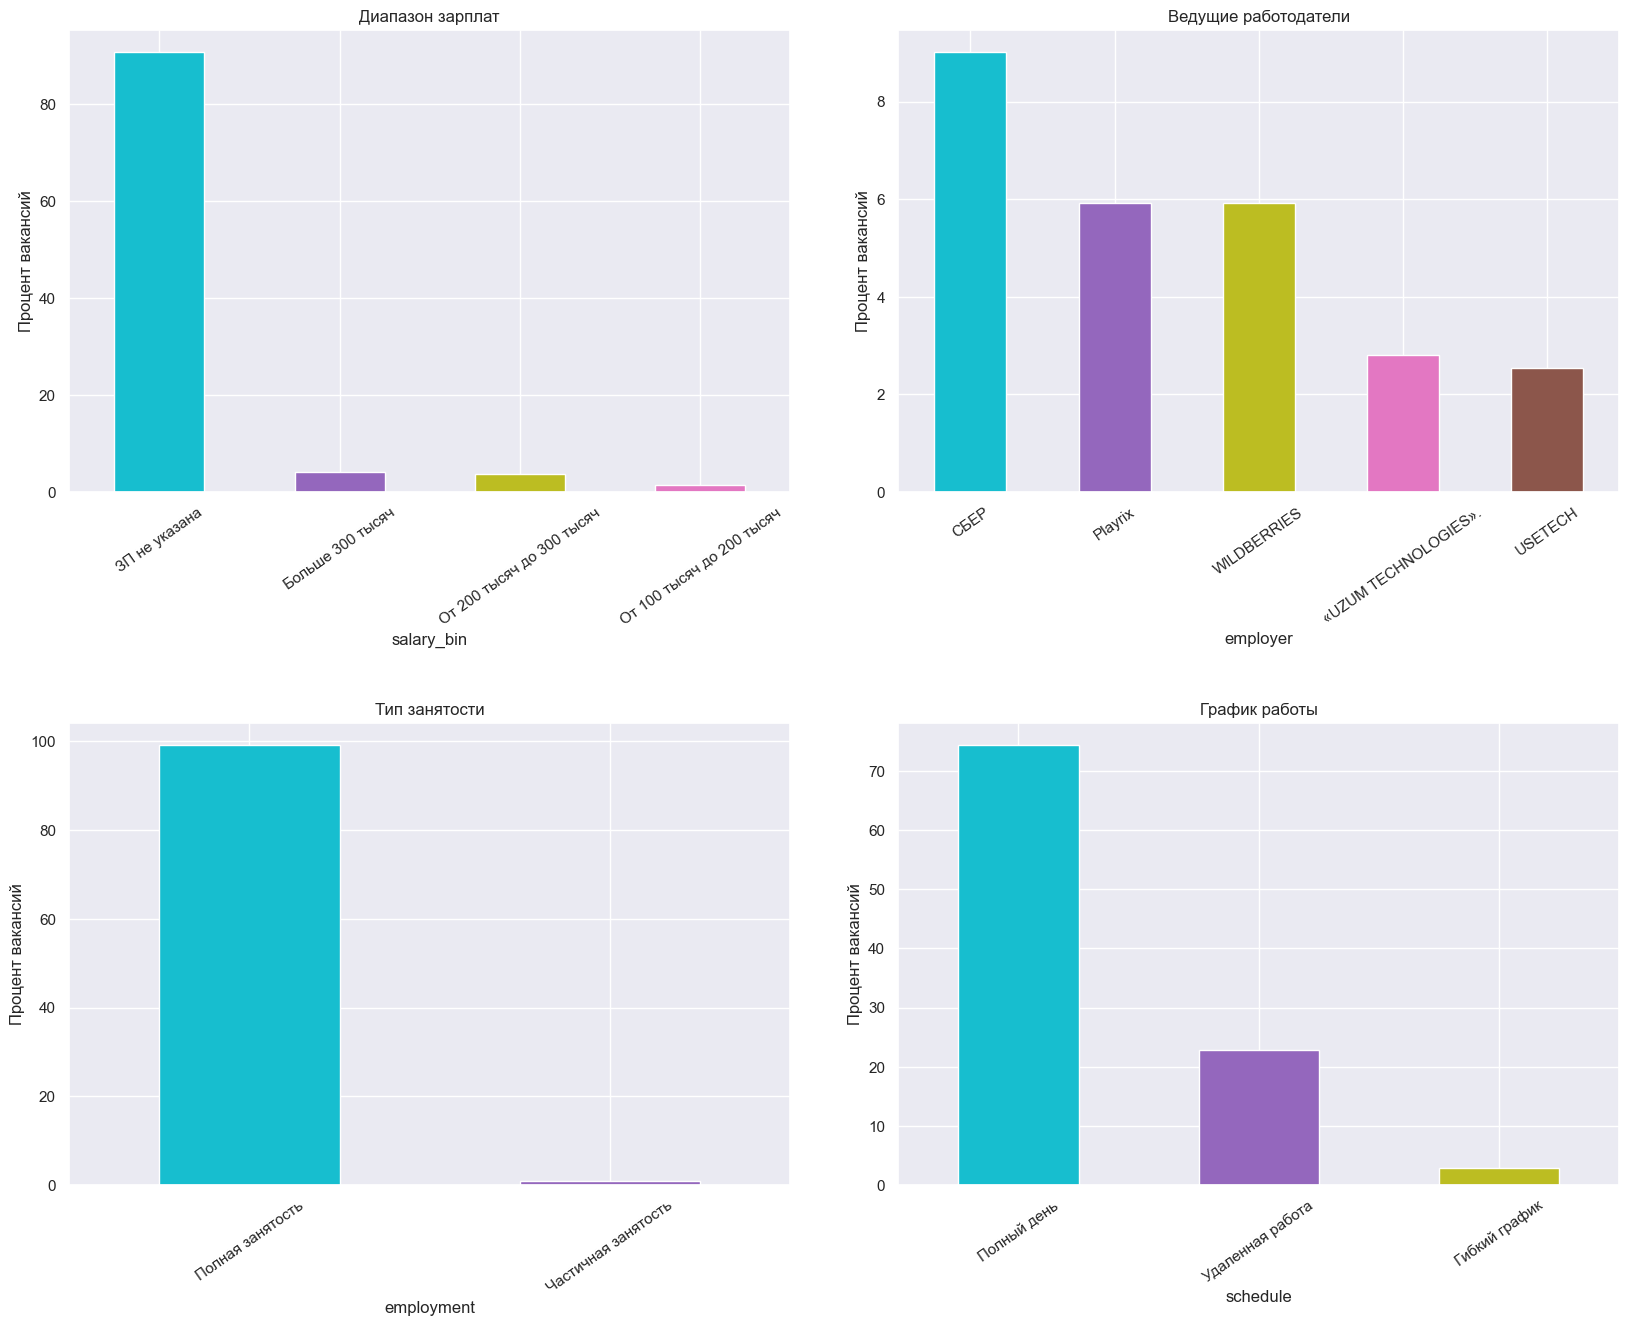

In [58]:
сharplots('ДА', da_df, 'Middle')

__Диапазон зарплат__ Cреди вакансий для Middle специалистов, также около 90% не указывают уровень зарплаты. Однако, среди оставшихся данных можно отметить, что средняя зарплата для специалистов этого уровня составляет 300 тыс. руб.

__Ведущие работодатели.__ Лидером по количеству вакансий как остается СБЕР, предлагающий около 9% от общего числа, за ним идут Playrix и WILDBERRIES, каждая из которых предлагает почти по 6% вакансий.  

__Тип занятости.__ Ситуация остается прежней: почти все вакансии предполагают полную занятость.

__График работы.__ Доля вакансий с возможностью удаленной работы достигает уже около 23%.

### Типичное место работы Senior ДА.


                       Типичные характеристики вакансий для ДА грейда Senior



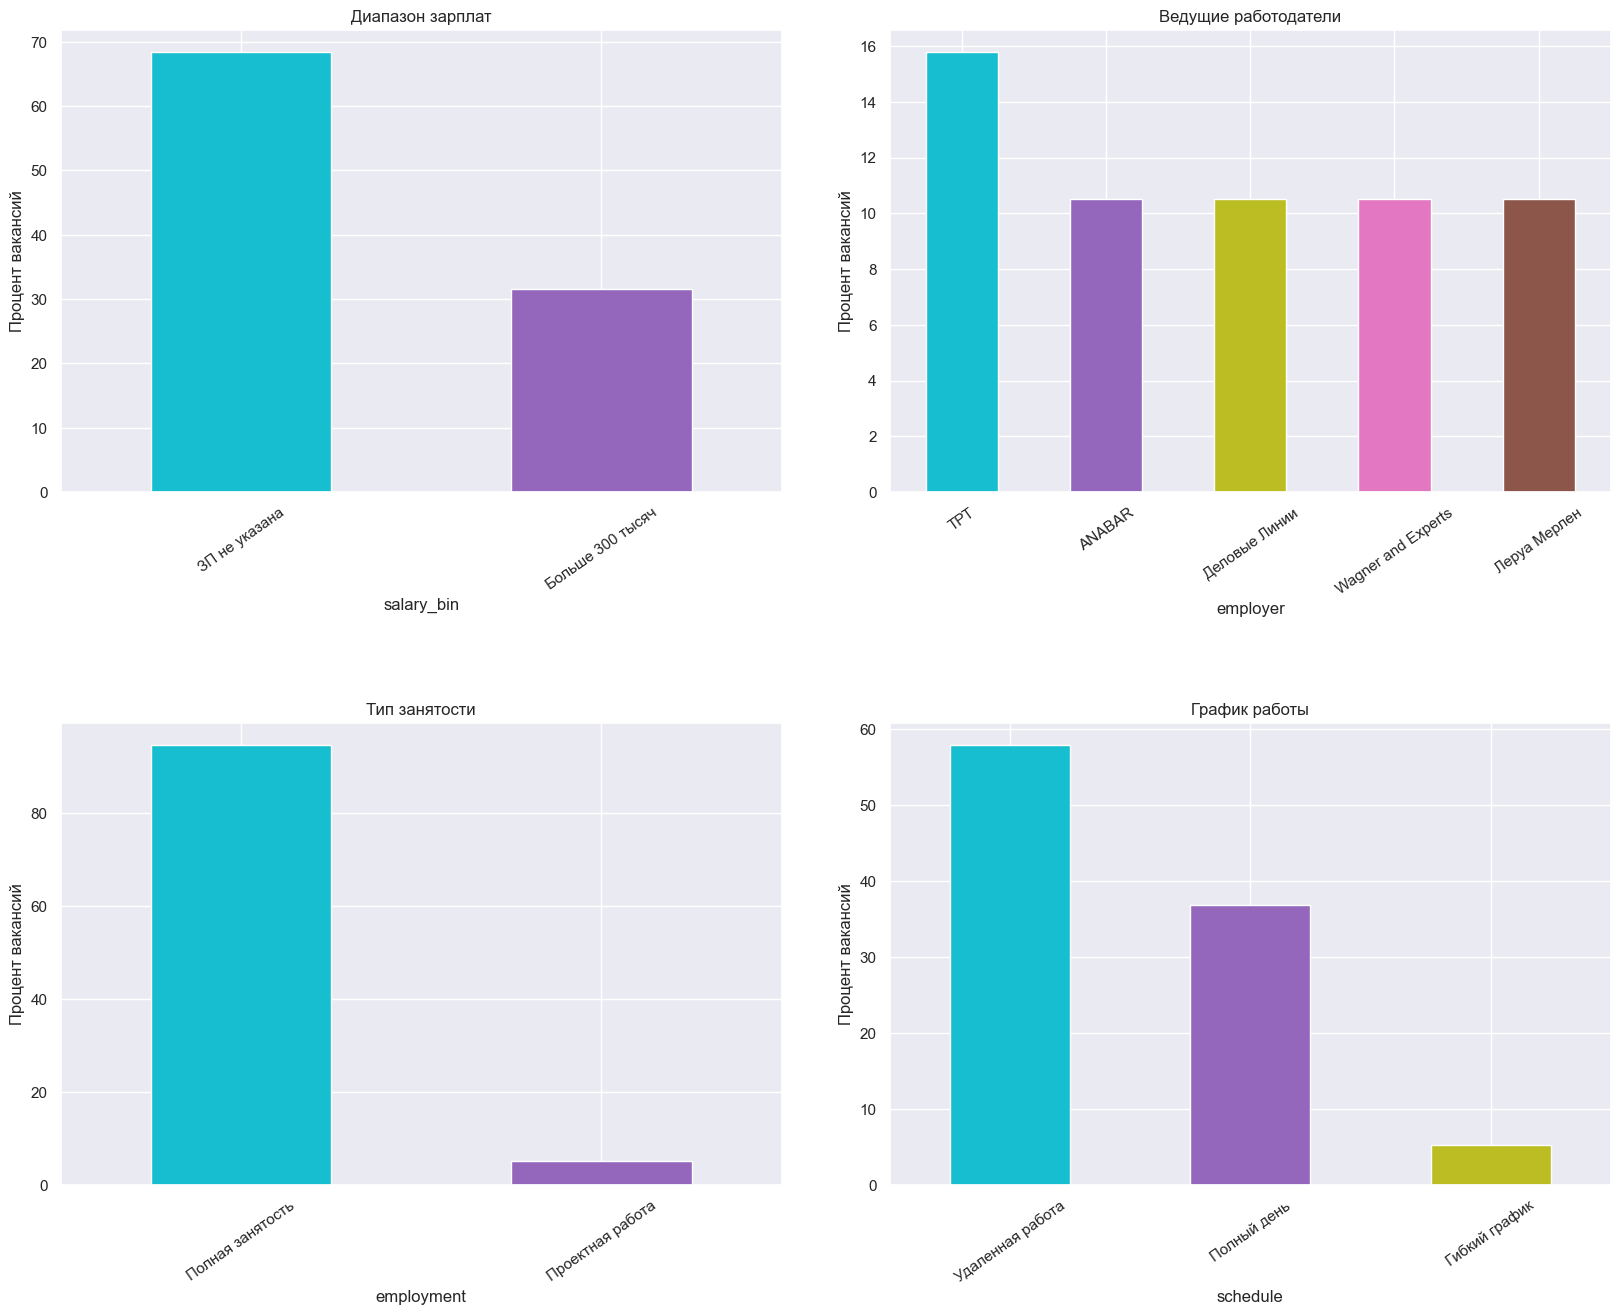

In [59]:
сharplots('ДА', da_df, 'Senior')

In [60]:
da_df.query('experience == "Senior"')['id'].count()

19

Примечание: выборка ДА senior специалистов является наименьшей и составляет лишь 19 вакансий.

__Диапазон зарплат.__ Зарплата не указана почти в 70% вакансий, при этом оставшиеся вакансии в основном предлагают зарплату более 300 тыс. руб.

__Ведущие работодател.__ Senior ДА наиболее востребованы у ТРТ (16% вакансий), ANABAR, Деловые Линии, Wagner and Experts и Леруа Мерлен.

__Тип занятости.__ Вакансии с полной занятостью составляют почти 90%, оставшаяся доля приходится на проектную работу.

__График работы.__ Для Senior специалистов основным форматом стала удаленная работа - чуть меньше 60%, в то время как полная занятость теперь занимает второе место - менее 40% вакансий.

# Динамика количества вакансий.

Посмотрим на изменения в количестве опубликованных вакансий по месяцам.

Выведем самые ранние и поздние даты публикаций вакансий.

In [61]:
print('Мин. дата публикации вакансий для БА', ba_df['published_at'].dt.date.min())
print('Макс. дата публикации вакансий для БА', ba_df['published_at'].dt.date.max())
print()
print('Мин. дата публикации вакансий для ДА', da_df['published_at'].dt.date.min())
print('Макс. дата публикации вакансий для ДА', da_df['published_at'].dt.date.max())

Мин. дата публикации вакансий для БА 2023-10-02
Макс. дата публикации вакансий для БА 2024-01-30

Мин. дата публикации вакансий для ДА 2023-09-26
Макс. дата публикации вакансий для ДА 2024-01-30


## График динамики количества вакансий для БА.

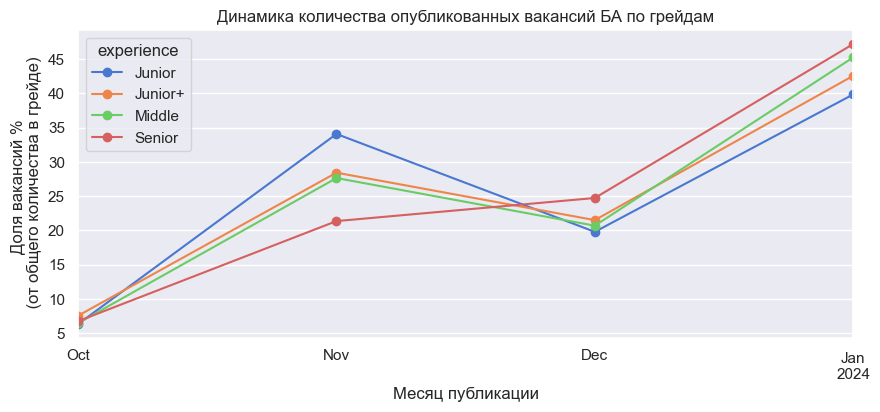

In [62]:
#создаем сводную таблицу
ba = ba_df.pivot_table(index='month', values='id', columns='experience', aggfunc='count')
#доля вакансий 
ba = ba/ba.sum() * 100
#строим график
ba.plot(grid=True, figsize=(10, 4), style='o-')
plt.title('Динамика количества опубликованных вакансий БА по грейдам')
plt.xlabel("Месяц публикации")
plt.ylabel("Доля вакансий % \n (от общего количества в грейде)");

В течение этого периода виден устойчивый рост кол-ва вакансий для всех уровней специалистов. Динамика примерно одинакова для всех грейдов.      
Наблюдается спад кол-ва вакансий в декабре и их резкий прирост в январе, это может быть связано с сезонными колебаниями в рынке труда, например, с праздничным периодом и снижением активности работодателей.

## График динамики количества вакансий для ДА.

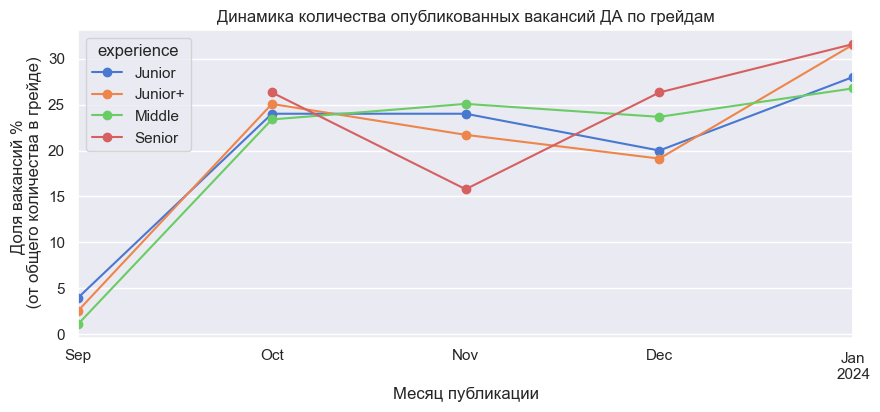

In [63]:
#создаем сводную таблицу
da = da_df.pivot_table(index='month', values='id', columns='experience', aggfunc='count')
#доля вакансий 
da = da/da.sum() * 100
#строим график
da.plot(grid=True, figsize=(10, 4), style='o-')
plt.title('Динамика количества опубликованных вакансий ДА по грейдам')
plt.xlabel("Месяц публикации")
plt.ylabel("Доля вакансий % \n (от общего количества в грейде)");

Динамика для ДА более спокойная в отличие от БА в период октябрь-январь, но она также растет к январю 2024.
Резкий скачок в октябре следствие того, что в данные попали вакансии только от 26 сентября 2023 года.
На отрезке октябрь-декабрь динамика более менее стабильна, стоит отметить резкое падение доли вакансий senior в ноябре и плавное junior+ специалистов в ноябре-декабре, но к январю доля вакансий junior+ и senior специалистов становится наибольшей среди остальных.

# Общий вывод.  

В нашем анализе представлены 786 вакансий для Data Analyst (ДА) и 4171 для Business Analyst (БА).

Больше всего вакансий для ДА предлагают в СБЕРе, а для БА — в Банке ВТБ.

Основная масса вакансий сосредоточена в Москве: 75,5% для ДА и 72,5% для БА.

Среди специалистов с опытом работы наиболее популярны Junior+ (1-3 года) и Middle (3-6 лет): 49% и 45% вакансий для ДА, а для БА — 51% и 38%. Специалисты без опыта (Junior) чаще требуются в БА: 9% вакансий по сравнению с 3% для ДА.

Практически все вакансии обеих специальностей подразумевают полный рабочий день и полную занятость. Также с увеличением опыта работы растёт доля предложений с удалённой работой.

Уровень зарплаты, как правило, растёт с увеличением опыта. Наблюдается и рост числа вакансий, где зарплата не указана, с повышением грейда.

Ключевые soft-навыки для БА и ДА схожи, но hard-навыки значительно отличаются. Знание SQL является важным для обеих профессий. Для БА акцент сделан на моделировании и управлении бизнес-процессами, а для ДА — на программировании и визуализации данных.

Ежемесячная доля опубликованных вакансий по грейдам демонстрирует положительную динамику для обеих специальностей. В общем, наблюдается стабильный рост с небольшими колебаниями, и к концу анализа доля достигает своего максимума.
